In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!git clone --recursive https://github.com/Microsoft/LightGBM
%cd /content/LightGBM/
!mkdir build
!cmake -DUSE_GPU=1 #avoid ..
!make -j$(nproc)
!sudo apt-get -y install python-pip
!sudo -H pip install setuptools pandas numpy scipy scikit-learn -U
%cd /content/LightGBM/python-package
!sudo python setup.py install --precompile

Cloning into 'LightGBM'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 14518 (delta 22), reused 10 (delta 6), pack-reused 14460
Receiving objects: 100% (14518/14518), 10.15 MiB | 12.32 MiB/s, done.
Resolving deltas: 100% (10412/10412), done.
Submodule 'include/boost/compute' (https://github.com/boostorg/compute) registered for path 'compute'
Cloning into '/content/LightGBM/compute'...
remote: Enumerating objects: 21728, done.        
remote: Total 21728 (delta 0), reused 0 (delta 0), pack-reused 21728        
Receiving objects: 100% (21728/21728), 8.51 MiB | 3.73 MiB/s, done.
Resolving deltas: 100% (17565/17565), done.
Submodule path 'compute': checked out '36c89134d4013b2e5e45bc55656a18bd6141995a'
/content/LightGBM
-- The C compiler identification is GNU 7.4.0
-- The CXX compiler identification is GNU 7.4.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler

In [3]:
#%cp -rp '/content/drive/My Drive/ta-lib/' ~/
%cd ~
!rm -rf ta-lib*
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
#%cd '/content/drive/My Drive/ta-lib'
#%cd ta-lib
import os
#os.chdir('/content/drive/My Drive/ta-lib') # Can't use !cd in co-lab
os.chdir('ta-lib') # Can't use !cd in co-lab
#%cd ~/ta-lib
!./configure --prefix=/usr
#! '/content/drive/My Drive/ta-lib/configure' --prefix=/usr
!make
!make install
!pip install Ta-Lib
%cd /content

/root
--2019-09-29 12:53:55--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 216.105.38.13
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|216.105.38.13|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2019-09-29 12:53:55--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 216.105.38.13
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: https://netix.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2019-09-29 12:53:55--  https://netix.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving netix.dl.sourc

In [4]:
!pip install optuna
!pip install joblib
#!pip --no-cache-dir install lightgbm --install-option=--gpu --install-option="--opencl-include-dir=/usr/local/cuda/include/" --install-option="--opencl-library=/usr/local/cuda/lib64/libOpenCL.so"
#!pip install lightgbm --install-option=--GPU
#!sudo pip --no-cache-dir install -I lightgbm --install-option=--gpu --install-option="--opencl-include-dir=/usr/local/cuda/include/" --install-option="--opencl-library=/usr/local/cuda/lib64/libOpenCL.so"

import lightgbm as lgb
import xgboost as xgb
import pickle
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from multiprocessing import Pool, Value, Array
import multiprocessing as multi
from joblib import Parallel, delayed
import talib as ta
from datetime import datetime, timedelta, timezone
import sklearn.metrics
from sklearn.model_selection import train_test_split
from functools import partial
import optuna
import joblib
from joblib import Parallel, delayed
import time
import random

     |████████████████████████████████| 102kB 11.5MB/s 
     |████████████████████████████████| 81kB 31.3MB/s 
     |████████████████████████████████| 1.1MB 60.3MB/s 
     |████████████████████████████████| 61kB 13.6MB/s 
     |████████████████████████████████| 112kB 58.4MB/s 
     |████████████████████████████████| 51kB 28.5MB/s 
     |████████████████████████████████| 471kB 68.8MB/s 
  Created wheel for optuna: filename=optuna-0.16.0-cp36-none-any.whl size=128736 sha256=15cd22cf6a3321b5a22209062d891d3950e3c436e82f1d78b2cc3da894c6ee54
  Stored in directory: /root/.cache/pip/wheels/20/b1/96/362808be9c7432877b2e958c616f18d80026d7d7db24dbcef3
  Created wheel for alembic: filename=alembic-1.2.1-py2.py3-none-any.whl size=144229 sha256=0bfe83424d4547a50ba9642503ba659c73d8ec4648ec6609f615eb36cf2960d3
  Stored in directory: /root/.cache/pip/wheels/c6/b8/fd/1f16371156a8184172c4935cbbef6a345d57dd447e31a36633
  Created wheel for Mako: filename=Mako-1.1.0-cp36-none-any.whl size=75363 sha256=9a246

In [0]:


class OneMinData:
    def initialize(self):
        self.func_dict = {} #key = [func_name + term], val = (function object, term)        
        self.index_data_dict = {} #key= [func_name + term]], val = [index data]
        self.unix_time = []
        self.dt = []
        self.open = []
        self.high = []
        self.low = []
        self.close = []
        self.size = []
        self.bpsp = []


    def cut_data(self, num_data):
        for k in self.index_data_dict:
            self.index_data_dict[k] = self.index_data_dict[k][-num_data:]
        self.unix_time = self.unix_time[-num_data:]
        self.dt = self.dt[-num_data:]
        self.open = self.open[-num_data:]
        self.high = self.high[-num_data:]
        self.low = self.low[-num_data:]
        self.close = self.close[-num_data:]
        self.size = self.size[-num_data:]
        self.bpsp = self.bpsp[-num_data:]


    def del_data(self, num_remain_data):
        if len(self.unix_time) > num_remain_data:
            for k in self.index_data_dict:
                del self.index_data_dict[k][:-num_remain_data]
            del self.unix_time[:-num_remain_data]
            del self.dt[:-num_remain_data]
            del self.open[:-num_remain_data]
            del self.high[:-num_remain_data]
            del self.low[:-num_remain_data]
            del self.close[:-num_remain_data]
            del self.size[:-num_remain_data]
            del self.bpsp[:-num_remain_data]

            

    def extract_data(self, ex_from, to):
        if len(self.unix_time) > ex_from:
            for k in self.index_data_dict:
                del self.index_data_dict[k][-ex_from:-to]
            del self.unix_time[-ex_from:-to]
            del self.dt[-ex_from:-to]
            del self.open[-ex_from:-to]
            del self.high[-ex_from:-to]
            del self.low[-ex_from:-to]
            del self.close[-ex_from:-to]
            del self.size[-ex_from:-to]
            del self.bpsp[-ex_from:-to]


    def add_and_pop(self, unix_time, dt, open, high, low, close, size):
        self.unix_time.append(unix_time)
        self.unix_time.pop(0)
        self.dt.append(dt)
        self.dt.pop(0)
        self.open.append(open)
        self.open.pop(0)
        self.high.append(high)
        self.high.pop(0)
        self.low.append(low)
        self.low.pop(0)
        self.close.append(close)
        self.close.pop(0)
        self.size.append(size)
        self.size.pop(0)

In [0]:

class OneMinMarketData:
    @classmethod
    def initialize_for_bot(cls, num_term, pt, lc, initial_data_vol):
        cls.num_term = num_term
        cls.term_list = cls.generate_term_list(num_term)
        cls.pt = pt
        cls.lc = lc
        cls.ohlc = cls.read_from_csv('/content/drive/My Drive/mex_data.csv')
        cls.ohlc.del_data(initial_data_vol)
        cls.__generate_all_func_dict()
        cls.__calc_all_index_dict()
        
    @classmethod
    def update_for_bot(cls):
        cls.__calc_all_index()
        

    @classmethod
    def read_from_csv(cls, file_name):
        ohlc = OneMinData()
        ohlc.initialize()
        df = pd.read_csv(file_name)
        ohlc.dt = list(map(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S'), list(df['dt'])))
        ohlc.unix_time = list(df['timestamp'])
        ohlc.open = list(df['open'])
        ohlc.high = list(df['high'])
        ohlc.low = list(df['low'])
        ohlc.close = list(df['close'])
        ohlc.size = list(df['volume'])
        return ohlc
    
    
    @classmethod
    def write_all_func_dict(cls):
        with open('/content/drive/My Drive/Model/bpsp_cols.csv', 'w') as file:
            writer = csv.writer(file, lineterminator='\n')
            writer.writerow(list(cls.ohlc.func_dict.keys()))
        print('completed write bpsp columns')
        
        
    @classmethod
    def read_func_dict(cls):
        #read from func / term list
        cols = []
        with open('/content/drive/My Drive/Model/bpsp_cols.csv', 'r') as f:
            reader = csv.reader(f)
            for r in reader:
                cols.append(r)
        #copy matched key func val
        func_obj= {}
        for col in cols[0]:
            func_obj[col] = cls.ohlc.func_dict[col]
        #replace ohlc.func_dict
        cls.ohlc.func_dict = func_obj
    
    
    
    '''
    generate all func / term as a dict
    calc all index as a dict
    generate df from the index data dict
    calc correlation
    remove correlated columns
    renew fund / term dict with non-correlated func / term
    calc index data of the renewed dict
    '''
    
    @classmethod
    def __generate_all_func_dict(cls):
        for term in cls.term_list:
            cls.ohlc.func_dict['ema:'+str(term)] = (OneMinMarketData.calc_ema,term)
            cls.ohlc.func_dict['ema_kairi:'+str(term)] = (OneMinMarketData.calc_ema_kairi,term)
            cls.ohlc.func_dict['ema_gra:'+str(term)] = (OneMinMarketData.calc_ema_gra,term)
            cls.ohlc.func_dict['dema:'+str(term)] = (OneMinMarketData.calc_dema,term)
            cls.ohlc.func_dict['dema_kairi:'+str(term)] = (OneMinMarketData.calc_dema_kairi,term)
            cls.ohlc.func_dict['dema_gra:'+str(term)] = (OneMinMarketData.calc_dema_gra,term)
            cls.ohlc.func_dict['momentum:'+str(term)] = (OneMinMarketData.calc_momentum,term)
            cls.ohlc.func_dict['rate_of_change:'+str(term)] = (OneMinMarketData.calc_rate_of_change,term)
            cls.ohlc.func_dict['rsi:'+str(term)] = (OneMinMarketData.calc_rsi,term)
            cls.ohlc.func_dict['williams_R:'+str(term)] = (OneMinMarketData.calc_williams_R,term)
            cls.ohlc.func_dict['beta:'+str(term)] = (OneMinMarketData.calc_beta,term)
            cls.ohlc.func_dict['time_series_forecast:'+str(term)] = (OneMinMarketData.calc_time_series_forecast,term)
            cls.ohlc.func_dict['correl:'+str(term)] = (OneMinMarketData.calc_correl,term)
            cls.ohlc.func_dict['linear_reg:'+str(term)] = (OneMinMarketData.calc_linear_reg,term)
            cls.ohlc.func_dict['linear_reg_angle:'+str(term)] = (OneMinMarketData.calc_linear_reg_angle,term)
            cls.ohlc.func_dict['linear_reg_intercept:'+str(term)] = (OneMinMarketData.calc_linear_reg_intercept,term)
            cls.ohlc.func_dict['linear_reg_slope:'+str(term)] = (OneMinMarketData.calc_linear_reg_slope,term)
            cls.ohlc.func_dict['stdv:'+str(term)] = (OneMinMarketData.calc_stdv,term)
            cls.ohlc.func_dict['var:'+str(term)] = (OneMinMarketData.calc_var,term)
            cls.ohlc.func_dict['adx:'+str(term)] = (OneMinMarketData.calc_adx,term)
            cls.ohlc.func_dict['aroon_os:'+str(term)] = (OneMinMarketData.calc_aroon_os,term)
            cls.ohlc.func_dict['cci:'+str(term)] = (OneMinMarketData.calc_cci,term)
            cls.ohlc.func_dict['dx:'+str(term)] = (OneMinMarketData.calc_dx,term)
            if term >= 10:
                cls.ohlc.func_dict['macd:'+str(term)] = (OneMinMarketData.calc_macd,term)
                cls.ohlc.func_dict['macd_signal:'+str(term)] = (OneMinMarketData.calc_macd_signal,term)
                cls.ohlc.func_dict['macd_hist:'+str(term)] = (OneMinMarketData.calc_macd_hist,term)
                
            cls.ohlc.func_dict['makairi_momentum:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_momentum, term)
            cls.ohlc.func_dict['makairi_rate_of_change:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_rate_of_change, term)
            cls.ohlc.func_dict['makairi_rsi:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_rsi, term)
            cls.ohlc.func_dict['makairi_williams_R:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_williams_R, term)
            cls.ohlc.func_dict['makairi_beta:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_beta, term)
            cls.ohlc.func_dict['makairi_time_series_forecast:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_time_series_forecast, term)
            cls.ohlc.func_dict['makairi_correl:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_correl, term)
            cls.ohlc.func_dict['makairi_linear_reg:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_linear_reg, term)
            cls.ohlc.func_dict['makairi_linear_reg_angle:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_linear_reg_angle, term)
            cls.ohlc.func_dict['makairi_linear_reg_intercept:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_linear_reg_intercept, term)
            cls.ohlc.func_dict['makairi_linear_reg_slope:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_linear_reg_slope, term)
            cls.ohlc.func_dict['makairi_stdv:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_stdv, term)
            cls.ohlc.func_dict['makairi_var:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_var, term)
            cls.ohlc.func_dict['makairi_adx:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_adx, term)
            cls.ohlc.func_dict['makairi_aroon_os:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_aroon_os, term)
            cls.ohlc.func_dict['makairi_cci:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_cci, term)
            cls.ohlc.func_dict['makairi_dx:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_dx, term)
            
            cls.ohlc.func_dict['diff_momentum:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_momentum, term)
            cls.ohlc.func_dict['diff_rate_of_change:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_rate_of_change, term)
            cls.ohlc.func_dict['diff_rsi:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_rsi, term)
            cls.ohlc.func_dict['diff_williams_R:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_williams_R, term)
            cls.ohlc.func_dict['diff_beta:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_beta, term)
            cls.ohlc.func_dict['diff_time_series_forecast:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_time_series_forecast, term)
            cls.ohlc.func_dict['diff_correl:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_correl, term)
            cls.ohlc.func_dict['diff_linear_reg:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_linear_reg, term)
            cls.ohlc.func_dict['diff_linear_reg_angle:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_linear_reg_angle, term)
            cls.ohlc.func_dict['diff_linear_reg_intercept:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_linear_reg_intercept, term)
            cls.ohlc.func_dict['diff_linear_reg_slope:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_linear_reg_slope, term)
            cls.ohlc.func_dict['diff_stdv:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_stdv, term)
            cls.ohlc.func_dict['diff_var:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_var, term)
            cls.ohlc.func_dict['diff_adx:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_adx, term)
            cls.ohlc.func_dict['diff_aroon_os:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_aroon_os, term)
            cls.ohlc.func_dict['diff_cci:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_cci, term)
            cls.ohlc.func_dict['diff_dx:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_dx, term)
            
        cls.ohlc.func_dict['normalized_ave_true_range:'+str(0)] = (OneMinMarketData.calc_normalized_ave_true_range,0)
        cls.ohlc.func_dict['three_outside_updown:'+str(0)] = (OneMinMarketData.calc_three_outside_updown,0)
        cls.ohlc.func_dict['breakway:'+str(0)] = (OneMinMarketData.calc_breakway,0)
        cls.ohlc.func_dict['dark_cloud_cover:'+str(0)] = (OneMinMarketData.calc_dark_cloud_cover,0)
        cls.ohlc.func_dict['dragonfly_doji:'+str(0)] = (OneMinMarketData.calc_dragonfly_doji,0)
        cls.ohlc.func_dict['updown_sidebyside_white_lines:'+str(0)] = (OneMinMarketData.calc_updown_sidebyside_white_lines,0)
        cls.ohlc.func_dict['haramisen:'+str(0)] = (OneMinMarketData.calc_haramisen,0)
        cls.ohlc.func_dict['hikkake_pattern:'+str(0)] = (OneMinMarketData.calc_hikkake_pattern,0)
        cls.ohlc.func_dict['neck_pattern:'+str(0)] = (OneMinMarketData.calc_neck_pattern,0)
        cls.ohlc.func_dict['upsidedownside_gap_three_method:'+str(0)] = (OneMinMarketData.calc_upsidedownside_gap_three_method,0)
        cls.ohlc.func_dict['sar:'+str(0)] = (OneMinMarketData.calc_sar,0)
        cls.ohlc.func_dict['bop:'+str(0)] = (OneMinMarketData.calc_bop,0)
        
        cls.ohlc.bpsp = cls.calc_bpsp_points()
        
        
        
    @classmethod
    def __calc_all_index_dict(cls):
        print('calculating all index dict')
        start_time = time.time()
        for k in cls.ohlc.func_dict:
            if k.split('_')[0] == 'makairi':
                data = cls.ohlc.func_dict[k][1](cls.ohlc.func_dict[k][2])
                cls.ohlc.index_data_dict[k] = cls.ohlc.func_dict[k][0](data,cls.ohlc.func_dict[k][2])
            elif k.split('_')[0] == 'diff':
                data = cls.ohlc.func_dict[k][1](cls.ohlc.func_dict[k][2])
                cls.ohlc.index_data_dict[k] = cls.ohlc.func_dict[k][0](data)
            elif int(k.split(':')[1]) > 0 :
                cls.ohlc.index_data_dict[k] = cls.ohlc.func_dict[k][0](cls.ohlc.func_dict[k][1])
            else:
                cls.ohlc.index_data_dict[k] = cls.ohlc.func_dict[k][0]()
        print('completed calc all index. time=',time.time() - start_time)
            
            
    @classmethod
    def genrate_df_from_dict(cls):
        cut_size = cls.term_list[-1] * 2
        end = len(cls.ohlc.close) - 10
        df = pd.DataFrame(OneMinMarketData.ohlc.index_data_dict)
        df = df.assign(dt=cls.ohlc.dt)
        df = df.assign(open=cls.ohlc.open)
        df = df.assign(high=cls.ohlc.high)
        df = df.assign(low=cls.ohlc.low)
        df = df.assign(close=cls.ohlc.close)
        df = df.assign(size=cls.ohlc.size)
        df = df.assign(bpsp=cls.ohlc.bpsp)
        return df.iloc[cut_size:end]
        

    @classmethod
    def __calc_all_index(cls):
        start_time = time.time()
        cls.ohlc.ave_price = cls.calc_ave_price(cls.ohlc.open, cls.ohlc.high, cls.ohlc.low, cls.ohlc.close)
        for term in cls.term_list:
            cls.ohlc.ema[term] = cls.calc_ema(term, cls.ohlc.close)
            cls.ohlc.ema_kairi[term] = cls.calc_ema_kairi(cls.ohlc.close, cls.ohlc.ema[term])
            cls.ohlc.ema_gra[term] = cls.calc_ema_gra(cls.ohlc.ema[term])
            cls.ohlc.dema[term] = cls.calc_dema(term, cls.ohlc.close)
            cls.ohlc.dema_kairi[term] = cls.calc_dema_kairi(cls.ohlc.close, cls.ohlc.dema[term])
            cls.ohlc.dema_gra[term] = cls.calc_dema_gra(cls.ohlc.dema[term])
            cls.ohlc.momentum[term] = cls.calc_momentum(term, cls.ohlc.close)
            cls.ohlc.rate_of_change[term] = cls.calc_rate_of_change(term, cls.ohlc.close)
            cls.ohlc.rsi[term] = cls.calc_rsi(term, cls.ohlc.close)
            cls.ohlc.williams_R[term] = cls.calc_williams_R(term, cls.ohlc.high, cls.ohlc.low, cls.ohlc.close)
            cls.ohlc.beta[term] = cls.calc_beta(term, cls.ohlc.high, cls.ohlc.low)
            cls.ohlc.tsf[term] = cls.calc_time_series_forecast(term, cls.ohlc.close)
            cls.ohlc.correl[term] = cls.calc_correl(term, cls.ohlc.high, cls.ohlc.low)
            cls.ohlc.linear_reg[term] = cls.calc_linear_reg(term, cls.ohlc.close)
            cls.ohlc.linear_reg_angle[term] = cls.calc_linear_reg_angle(term, cls.ohlc.close)
            cls.ohlc.linear_reg_intercept[term] = cls.calc_linear_reg_intercept(term, cls.ohlc.close)
            cls.ohlc.linear_reg_slope[term] = cls.calc_linear_reg_slope(term, cls.ohlc.close)
            cls.ohlc.stdv[term] = cls.calc_stdv(term, cls.ohlc.close)
            cls.ohlc.var[term] = cls.calc_var(term, cls.ohlc.close)
            cls.ohlc.linear_reg_ave[term] = cls.calc_linear_reg(term, cls.ohlc.ave_price)
            cls.ohlc.linear_reg_angle_ave[term] = cls.calc_linear_reg_angle(term, cls.ohlc.ave_price)
            cls.ohlc.linear_reg_intercept_ave[term] = cls.calc_linear_reg_intercept(term, cls.ohlc.ave_price)
            cls.ohlc.linear_reg_slope_ave[term] = cls.calc_linear_reg_slope(term, cls.ohlc.ave_price)
            cls.ohlc.stdv_ave[term] = cls.calc_stdv(term, cls.ohlc.ave_price)
            cls.ohlc.var_ave[term] = cls.calc_var(term, cls.ohlc.ave_price)
            cls.ohlc.adx[term] = cls.calc_adx(term, cls.ohlc.high, cls.ohlc.low, cls.ohlc.close)
            cls.ohlc.aroon_os[term] = cls.calc_aroon_os(term, cls.ohlc.high, cls.ohlc.low)
            cls.ohlc.cci[term] = cls.calc_cci(term, cls.ohlc.high, cls.ohlc.low, cls.ohlc.close)
            cls.ohlc.dx[term] = cls.calc_dx(term, cls.ohlc.high, cls.ohlc.low, cls.ohlc.close)
            if term >= 10:
                cls.ohlc.macd[term], cls.ohlc.macdsignal[term], cls.ohlc.macdhist[term] = cls.calc_macd(cls.ohlc.close, int(float(term) / 2.0), term, int(float(term) / 3.0))
                cls.ohlc.macd[term] = list(cls.ohlc.macd[term])
                cls.ohlc.macdsignal[term] = list(cls.ohlc.macdsignal[term])
                cls.ohlc.macdhist[term] = list(cls.ohlc.macdhist[term])
                cls.ohlc.macd_ave[term], cls.ohlc.macdsignal_ave[term], cls.ohlc.macdhist_ave[term] = cls.calc_macd(cls.ohlc.ave_price, int(float(term) / 2.0), term,int(float(term) / 3.0))
                cls.ohlc.macd_ave[term] = list(cls.ohlc.macd_ave[term])
                cls.ohlc.macdsignal_ave[term] = list(cls.ohlc.macdsignal_ave[term])
                cls.ohlc.macdhist_ave[term] = list(cls.ohlc.macdhist_ave[term])
        cls.ohlc.normalized_ave_true_range = cls.calc_normalized_ave_true_range(cls.ohlc.high, cls.ohlc.low,
                                                                                cls.ohlc.close)
        cls.ohlc.three_outside_updown = cls.calc_three_outside_updown(cls.ohlc.open, cls.ohlc.high, cls.ohlc.low,
                                                                      cls.ohlc.close)
        cls.ohlc.breakway = cls.calc_breakway(cls.ohlc.open, cls.ohlc.high, cls.ohlc.low, cls.ohlc.close)
        cls.ohlc.dark_cloud_cover = cls.calc_dark_cloud_cover(cls.ohlc.open, cls.ohlc.high, cls.ohlc.low,
                                                              cls.ohlc.close)
        cls.ohlc.dragonfly_doji = cls.calc_dragonfly_doji(cls.ohlc.open, cls.ohlc.high, cls.ohlc.low, cls.ohlc.close)
        cls.ohlc.updown_sidebyside_white_lines = cls.calc_updown_sidebyside_white_lines(cls.ohlc.open, cls.ohlc.high,
                                                                                        cls.ohlc.low, cls.ohlc.close)
        cls.ohlc.haramisen = cls.calc_haramisen(cls.ohlc.open, cls.ohlc.high, cls.ohlc.low, cls.ohlc.close)
        cls.ohlc.hikkake_pattern = cls.calc_hikkake_pattern(cls.ohlc.open, cls.ohlc.high, cls.ohlc.low, cls.ohlc.close)
        cls.ohlc.neck_pattern = cls.calc_neck_pattern(cls.ohlc.open, cls.ohlc.high, cls.ohlc.low, cls.ohlc.close)
        cls.ohlc.upsidedownside_gap_three_method = cls.calc_upsidedownside_gap_three_method(cls.ohlc.open,
                                                                                            cls.ohlc.high, cls.ohlc.low,
                                                                                            cls.ohlc.close)
        cls.ohlc.sar = cls.calc_sar(cls.ohlc.high, cls.ohlc.low, 0.02, 0.2)
        cls.ohlc.bop = cls.calc_bop(cls.ohlc.open, cls.ohlc.high, cls.ohlc.low, cls.ohlc.close)
        cls.ohlc.bpsp = cls.calc_bpsp_points()
        #cls.ohlc.bp, cls.ohlc.sp = cls.calc_pl_ls_points()

        #generate various index
        for term in cls.term_list:
            cls.ohlc.various_makairi['emakairi'+str(term)] = cls.ohlc.ema_kairi[term]
            cls.ohlc.various_makairi['demakairi' + str(term)] = cls.ohlc.dema_kairi[term]
            cls.ohlc.various_diff['emadiff'+str(term)] = cls.ohlc.ema_kairi[term]
            cls.ohlc.various_diff['demadiff' + str(term)] = cls.ohlc.dema_kairi[term]
            cls.ohlc.various_makairi['momkairi' + str(term)] = cls.ohlc.momentum[term]
            cls.ohlc.various_diff['momdiff' + str(term)] = cls.ohlc.momentum[term]
            cls.ohlc.various_makairi['rsikairi' + str(term)] = cls.ohlc.rsi[term]
            cls.ohlc.various_diff['rsidiff' + str(term)] = cls.ohlc.rsi[term]
            cls.ohlc.various_makairi['williams_Rkairi' + str(term)] = cls.ohlc.williams_R[term]
            cls.ohlc.various_diff['williams_Rdiff' + str(term)] = cls.ohlc.williams_R[term]
            cls.ohlc.various_makairi['betakairi' + str(term)] = cls.ohlc.beta[term]
            cls.ohlc.various_diff['betadiff' + str(term)] = cls.ohlc.beta[term]
            cls.ohlc.various_makairi['linear_regkairi' + str(term)] = cls.ohlc.linear_reg[term]
            cls.ohlc.various_diff['linear_regdiff' + str(term)] = cls.ohlc.linear_reg[term]
            cls.ohlc.various_makairi['linear_reg_slopekairi' + str(term)] = cls.ohlc.linear_reg_slope[term]
            cls.ohlc.various_diff['linear_reg_slopediff' + str(term)] = cls.ohlc.linear_reg_slope[term]
            cls.ohlc.various_makairi['adxkairi' + str(term)] = cls.ohlc.adx[term]
            cls.ohlc.various_diff['adxdiff' + str(term)] = cls.ohlc.adx[term]
            cls.ohlc.various_makairi['aroon_oskairi' + str(term)] = cls.ohlc.aroon_os[term]
            cls.ohlc.various_diff['aroon_osdiff' + str(term)] = cls.ohlc.aroon_os[term]
            cls.ohlc.various_makairi['ccikairi' + str(term)] = cls.ohlc.cci[term]
            cls.ohlc.various_diff['ccidiff' + str(term)] = cls.ohlc.cci[term]
            if term >= 10:
                cls.ohlc.various_makairi['macdkairi' + str(term)] = cls.ohlc.macd[term]
                cls.ohlc.various_diff['macddiff' + str(term)] = cls.ohlc.macd[term]
                cls.ohlc.various_makairi['macdsignalkairi' + str(term)] = cls.ohlc.macdsignal[term]
                cls.ohlc.various_diff['macdsignaldiff' + str(term)] = cls.ohlc.macdsignal[term]
                cls.ohlc.various_makairi['macdhistkairi' + str(term)] = cls.ohlc.macdhist[term]
                cls.ohlc.various_diff['macdhistdiff' + str(term)] = cls.ohlc.macdhist[term]
        print('calc all index1 time={}'.format(time.time() - start_time))


    @classmethod
    def generate_raw_df(cls):
        def __change_dict_key(d, col_name):
            newd = dict(map(lambda k: (col_name + str(k), d[k][:]), d.keys()))
            return newd
        '''data_dict = {'dt':cls.ohlc.dt[:], 'open':cls.ohlc.open[:], 'high':cls.ohlc.high[:],'low':cls.ohlc.low[:],
                    'close':cls.ohlc.close[:], 'size':cls.ohlc.size[:], 'normalized_ave_true_range':cls.ohlc.normalized_ave_true_range[:],
                    'sar':cls.ohlc.sar[:],'bop':cls.ohlc.bop[:]}'''
        data_dict = {'dt': cls.ohlc.dt[:], 'open': cls.ohlc.open[:], 'high': cls.ohlc.high[:], 'low': cls.ohlc.low[:],
                     'close': cls.ohlc.close[:], 'size': cls.ohlc.size[:],
                     'normalized_ave_true_range': cls.ohlc.normalized_ave_true_range[:],
                     'three_outside_updown': cls.ohlc.three_outside_updown[:], 'breakway': cls.ohlc.breakway[:],
                     'dark_cloud_cover': cls.ohlc.dark_cloud_cover[:],
                     'dragonfly_doji': cls.ohlc.dragonfly_doji[:],
                     'three_oupdown_sidebyside_white_linesutside_updown': cls.ohlc.updown_sidebyside_white_lines[:],
                     'haramisen': cls.ohlc.haramisen[:], 'haramhikkake_patternisen': cls.ohlc.hikkake_pattern[:],
                     'neck_pattern': cls.ohlc.neck_pattern[:],
                     'upsidedownside_gap_three_method': cls.ohlc.upsidedownside_gap_three_method[:],
                     'sar': cls.ohlc.sar[:], 'bop': cls.ohlc.bop[:]}
        data_dict = {**data_dict, **__change_dict_key(cls.ohlc.ema, 'ema'),
                     **__change_dict_key(cls.ohlc.ema_ave, 'ema_ave'),
                     **__change_dict_key(cls.ohlc.ema_kairi, 'ema_kairi'),
                     **__change_dict_key(cls.ohlc.dema_kairi, 'dema_kairi'),
                     **__change_dict_key(cls.ohlc.ema_gra, 'ema_gra'), **__change_dict_key(cls.ohlc.dema, 'dema'),
                     **__change_dict_key(cls.ohlc.dema_ave, 'dema_ave'),
                     **__change_dict_key(cls.ohlc.dema_gra, 'dema_gra'),
                     **__change_dict_key(cls.ohlc.midprice, 'midprice'),
                     **__change_dict_key(cls.ohlc.momentum, 'momentum'),
                     **__change_dict_key(cls.ohlc.momentum_ave, 'momentum_ave'),
                     **__change_dict_key(cls.ohlc.rate_of_change, 'rate_of_change'),
                     **__change_dict_key(cls.ohlc.rsi, 'rsi'), **__change_dict_key(cls.ohlc.williams_R, 'williams_R'),
                     **__change_dict_key(cls.ohlc.beta, 'beta'), **__change_dict_key(cls.ohlc.tsf, 'tsf'),
                     **__change_dict_key(cls.ohlc.correl, 'correl'),
                     **__change_dict_key(cls.ohlc.linear_reg, 'linear_reg'),
                     **__change_dict_key(cls.ohlc.linear_reg_angle, 'linear_reg_angle'),
                     **__change_dict_key(cls.ohlc.linear_reg_intercept, 'linear_reg_intercept'),
                     **__change_dict_key(cls.ohlc.linear_reg_slope, 'linear_reg_slope'),
                     **__change_dict_key(cls.ohlc.stdv, 'stdv'), **__change_dict_key(cls.ohlc.var, 'var'),
                     **__change_dict_key(cls.ohlc.linear_reg_ave, 'linear_reg_ave'),
                     **__change_dict_key(cls.ohlc.linear_reg_angle_ave, 'linear_reg_angle_ave'),
                     **__change_dict_key(cls.ohlc.linear_reg_intercept_ave, 'linear_reg_intercept_ave'),
                     **__change_dict_key(cls.ohlc.linear_reg_slope_ave, 'linear_reg_slope_ave'),
                     **__change_dict_key(cls.ohlc.stdv_ave, 'stdv_ave'),
                     **__change_dict_key(cls.ohlc.var_ave, 'var_ave'), **__change_dict_key(cls.ohlc.adx, 'adx'),
                     **__change_dict_key(cls.ohlc.aroon_os, 'aroon_os'),
                     **__change_dict_key(cls.ohlc.cci, 'cci'), **__change_dict_key(cls.ohlc.dx, 'dx'),
                     **__change_dict_key(cls.ohlc.macd, 'macd'),
                     **__change_dict_key(cls.ohlc.macdsignal, 'macdsignal'),
                     **__change_dict_key(cls.ohlc.macdhist, 'macdhist'),
                     **__change_dict_key(cls.ohlc.macd_ave, 'macd_ave'),
                     **__change_dict_key(cls.ohlc.macdsignal_ave, 'macdsignal_ave'),
                     **__change_dict_key(cls.ohlc.macdhist_ave, 'macdhist_ave'),
                     ** __change_dict_key(cls.ohlc.various_makairi, 'various_makairi'),
                     **__change_dict_key(cls.ohlc.various_diff, 'various_diff')}
        df = pd.DataFrame.from_dict(data_dict)
        return df

    '''
    dema, adx, macdはnum_term * 2くらいnanが発生する
    print(df.isnull().sum())
    '''

    @classmethod
    def generate_df(cls):
        def __change_dict_key(d, col_name):
            newd = dict(map(lambda k: (col_name + '_'+str(k), d[k][cut_size:end]), d.keys()))
            return newd

        start_time = time.time()
        cut_size = cls.term_list[-1] * 2
        end = len(cls.ohlc.close) - 10 #remove last 700min data as future bp / sp maybe not precise in
        data_dict = {'dt': cls.ohlc.dt[cut_size:end], 'open': cls.ohlc.open[cut_size:end],
                     'high': cls.ohlc.high[cut_size:end], 'low': cls.ohlc.low[cut_size:end],
                     'close': cls.ohlc.close[cut_size:end], 'size': cls.ohlc.size[cut_size:end],
                     'normalized_ave_true_range': cls.ohlc.normalized_ave_true_range[cut_size:end],
                     'three_outside_updown': cls.ohlc.three_outside_updown[cut_size:end],
                     'breakway': cls.ohlc.breakway[cut_size:end],
                     'dark_cloud_cover': cls.ohlc.dark_cloud_cover[cut_size:end],
                     'dragonfly_doji': cls.ohlc.dragonfly_doji[cut_size:end],
                     'three_oupdown_sidebyside_white_linesutside_updown': cls.ohlc.updown_sidebyside_white_lines[
                                                                          cut_size:end],
                     'haramisen': cls.ohlc.haramisen[cut_size:end],
                     'haramhikkake_patternisen': cls.ohlc.hikkake_pattern[cut_size:end],
                     'neck_pattern': cls.ohlc.neck_pattern[cut_size:end],
                     'upsidedownside_gap_three_method': cls.ohlc.upsidedownside_gap_three_method[cut_size:end],
                     'sar': cls.ohlc.sar[cut_size:end], 'bop': cls.ohlc.bop[cut_size:end]}
        data_dict = {**data_dict, **__change_dict_key(cls.ohlc.ema, 'ema'),
                     **__change_dict_key(cls.ohlc.ema_ave, 'ema_ave'),
                     **__change_dict_key(cls.ohlc.ema_kairi, 'ema_kairi'),
                     **__change_dict_key(cls.ohlc.dema_kairi, 'dema_kairi'),
                     **__change_dict_key(cls.ohlc.ema_gra, 'ema_gra'), **__change_dict_key(cls.ohlc.dema, 'dema'),
                     **__change_dict_key(cls.ohlc.dema_ave, 'dema_ave'),
                     **__change_dict_key(cls.ohlc.dema_gra, 'dema_gra'),
                     **__change_dict_key(cls.ohlc.midprice, 'midprice'),
                     **__change_dict_key(cls.ohlc.momentum, 'momentum'),
                     **__change_dict_key(cls.ohlc.momentum_ave, 'momentum_ave'),
                     **__change_dict_key(cls.ohlc.rate_of_change, 'rate_of_change'),
                     **__change_dict_key(cls.ohlc.rsi, 'rsi'), **__change_dict_key(cls.ohlc.williams_R, 'williams_R'),
                     **__change_dict_key(cls.ohlc.beta, 'beta'), **__change_dict_key(cls.ohlc.tsf, 'tsf'),
                     **__change_dict_key(cls.ohlc.correl, 'correl'),
                     **__change_dict_key(cls.ohlc.linear_reg, 'linear_reg'),
                     **__change_dict_key(cls.ohlc.linear_reg_angle, 'linear_reg_angle'),
                     **__change_dict_key(cls.ohlc.linear_reg_intercept, 'linear_reg_intercept'),
                     **__change_dict_key(cls.ohlc.linear_reg_slope, 'linear_reg_slope'),
                     **__change_dict_key(cls.ohlc.stdv, 'stdv'), **__change_dict_key(cls.ohlc.var, 'var'),
                     **__change_dict_key(cls.ohlc.linear_reg_ave, 'linear_reg_ave'),
                     **__change_dict_key(cls.ohlc.linear_reg_angle_ave, 'linear_reg_angle_ave'),
                     **__change_dict_key(cls.ohlc.linear_reg_intercept_ave, 'linear_reg_intercept_ave'),
                     **__change_dict_key(cls.ohlc.linear_reg_slope_ave, 'linear_reg_slope_ave'),
                     **__change_dict_key(cls.ohlc.stdv_ave, 'stdv_ave'),
                     **__change_dict_key(cls.ohlc.var_ave, 'var_ave'), **__change_dict_key(cls.ohlc.adx, 'adx'),
                     **__change_dict_key(cls.ohlc.aroon_os, 'aroon_os'),
                     **__change_dict_key(cls.ohlc.cci, 'cci'), **__change_dict_key(cls.ohlc.dx, 'dx'),
                     **__change_dict_key(cls.ohlc.macd, 'macd'),
                     **__change_dict_key(cls.ohlc.macdsignal, 'macdsignal'),
                     **__change_dict_key(cls.ohlc.macdhist, 'macdhist'),
                     **__change_dict_key(cls.ohlc.macd_ave, 'macd_ave'),
                     **__change_dict_key(cls.ohlc.macdsignal_ave, 'macdsignal_ave'),
                     **__change_dict_key(cls.ohlc.macdhist_ave, 'macdhist_ave'),
                     **__change_dict_key(cls.ohlc.various_makairi, 'various_makairi'),
                     **__change_dict_key(cls.ohlc.various_diff, 'various_diff')}
        data_dict['bpsp'] = cls.ohlc.bpsp[cut_size:end]
#        data_dict['bp'] = cls.ohlc.bp[cut_size:end]
#        data_dict['sp'] = cls.ohlc.sp[cut_size:end]
        df = pd.DataFrame.from_dict(data_dict)
        return df

    @classmethod
    def generate_term_list(cls, num):
        term_list = []
        category_n = [5, 50, 200]
        term_list.extend(list(np.round(np.linspace(category_n[0], category_n[0] * num, num))))
        term_list.extend(list(np.round(np.linspace(category_n[1] + (category_n[0] * num),category_n[1] + (category_n[0] * num) + category_n[1] * num), num)))
        term_list.extend(list(np.round(np.linspace(category_n[2] + category_n[1] + (category_n[0] * num) + (category_n[1] * num),category_n[2] + (category_n[1] * num) + category_n[2] * num), num)))
        return list(map(int, term_list))


     #kairi of data
    @classmethod
    def generate_makairi(cls, data, ma_term):
        ma = list(ta.MA(np.array(data, dtype='f8'), timeperiod=ma_term))
        return list(map(lambda c, e: (c - e) / e, data, ma))

    @classmethod
    def generate_diff(cls, data):
        return list(ta.ROC(np.array(data, dtype='f8'), timeperiod=1))


    #points of long can get pt before lc and vice versa
    @classmethod
    def calc_pl_ls_points(cls):  # both pl and ls should be plus val as abs
        buy_points = []
        sell_points = []
        print(cls.pt)
        for i in range(len(cls.ohlc.close)):
            entry_p = cls.ohlc.open[i]
            j = 0
            while True: #loop for bp
                if i+ j < len(cls.ohlc.close):
                    if -cls.lc >= cls.ohlc.low[i+j] - entry_p: #lc before pt for buy
                        buy_points.append(0)
                        break
                    elif cls.pt <= cls.ohlc.high[i+j] - entry_p:
                        buy_points.append(1)
                        break
                else:
                    buy_points.append(0)
                    break
                j +=1
            j = 0
            while True: #loop for sp
                if i+ j < len(cls.ohlc.close):
                    if -cls.lc >= entry_p - cls.ohlc.high[i+j]: #lc before pt for buy
                        sell_points.append(0)
                        break
                    elif cls.pt <= entry_p - cls.ohlc.low[i+j]:
                        sell_points.append(1)
                        break
                else:
                    sell_points.append(0)
                    break
                j +=1
        return buy_points, sell_points
    
    
    #higher pl in next 1m for bp sp
    @classmethod
    def calc_bpsp_points(cls):
        bpsp = [] #0: buy, 1:sell
        for i in range(1, len(cls.ohlc.close)):
            if cls.ohlc.close[i] - cls.ohlc.close[i-1] > cls.ohlc.close[i-1] - cls.ohlc.close[i]:
                bpsp.append(1)
            else:
                bpsp.append(0)
        bpsp.append(None)
        return bpsp
        


    @classmethod
    def remove_all_correlated_cols(cls, df, corr_kijun):
        def remove_high_corr_cols(df, col_name, kijun):
            remove_cols = []
            num_corr = 0
            for i in range(len(df.columns) - 1):
                if df.columns[i] != col_name and df.columns[i] != 'dt':
                    corr = df[col_name].corr(df[df.columns[i]])
                    if corr > kijun and df.columns[i] not in ['open', 'high', 'low', 'close', 'size', 'bp', 'sp']:
                        num_corr += 1
                        remove_cols.append(df.columns[i])
            if len(remove_cols) > 0:
                df.drop(remove_cols, axis = 1, inplace = True)
                print('removed '+str(num_corr) + 'cols', ' total cols='+str(len(df.columns)))
            return df

        nt= 0
        df2 = df.copy()
        while True:
            if len(df2.columns) <= nt:
                print('kita')
                break
            elif df2.columns[nt] != 'dt':
                df2 = remove_high_corr_cols(df2, df2.columns[nt], corr_kijun)
            nt += 1
        return df2

    
    @classmethod
    def remove_all_correlated_cols2(self, df, corr_kijun):
        print('removing all correlated columns..')
        df2 = df.copy()
        df3 = df.copy()
        df2.drop(['dt'], axis=1, inplace=True)
        #corrs = np.corrcoef(np.array(df2).transpose())
        corrs = np.corrcoef(np.array(df2))
        remove_cols = []
        cols = list(df2.columns)
        for cor in corrs:
            for i in range(len(cor)):
                if cor[i] != 1.0 and cor[i] > corr_kijun:
                    if cols[i] not in remove_cols and cols[i] not in ['open', 'high', 'low', 'close', 'size', 'bp', 'sp']:
                        remove_cols.append(cols[i])
        df3.drop(remove_cols, axis=1, inplace=True)
        print('removed '+str(len(remove_cols))+' colums')
        print(remove_cols)
        return df3, corrs
    
    @classmethod
    def remove_all_correlated_cols3(self, df, corr_kijun):
        print('removing all correlated columns..')
        start_time = time.time()
        df2 = df.copy()
        df3 = df.copy()
        df2.drop(['dt'], axis=1, inplace=True)
        corrs = np.corrcoef(np.array(df2).transpose())

        # 1. 0番目から0.9以上のindexを検索
        def check_corr_kijun(cor, cor_ind, kijun):
            rem = []
            for i, c in enumerate(cor):
                if c >= kijun and i != cor_ind:
                    rem.append(i)
            return rem

        tmp_remo = []
        for i, cor in enumerate(corrs):
            if i not in tmp_remo:  # 3. 該当indexを除いて次のindexを対象に1の操作を実行
                # 2. 該当したindexをtmp_remoに記録
                tmp_remo.extend(check_corr_kijun(cor, i, corr_kijun))
        # 4. tmp_remoに記録されたindexのcolumnをdfから削除
        target_col = []
        cols = list(df2.columns)
        for tr in tmp_remo:
            target_col.append(cols[tr])
        excludes = ['dt', 'open', 'high', 'low', 'close', 'dt']
        for ex in excludes:
            if ex in target_col:
                target_col.remove(ex)
        df3.drop(target_col, axis=1, inplace=True)
        print('removed ' + str(len(target_col)) + ' colums', 'remaining col='+str(len(df3.columns)))
        print('time=',time.time()-start_time)
        return df3, corrs
                    

    @classmethod
    def calc_hist_high(cls, term, high, close):
        res = []
        for i in range(len(high) - term):
            res.append((max(high[i:i + term]) / close[i]) - 1)
        return res

    @classmethod
    def calc_hist_low(cls, term, low, close):
        res = []
        for i in range(len(low) - term):
            res.append((min(low[i:i + term]) / close[i]) - 1)
        return res


    @classmethod
    def calc_ema(cls, term):
        return list(ta.EMA(np.array(cls.ohlc.close, dtype='f8'), timeperiod=term))

    
    @classmethod
    def calc_ema_kairi(cls, term):
        return list(map(lambda c, e: (c - e) / e, cls.ohlc.close, cls.ohlc.index_data_dict['ema:'+str(term)]))

    @classmethod
    def calc_dema_kairi(cls, term):
        return list(map(lambda c, d: (c - d) / d, cls.ohlc.close, cls.ohlc.index_data_dict['dema:'+str(term)]))

    @classmethod
    def calc_ema_gra(cls, term):
        return list(pd.Series(cls.ohlc.index_data_dict['ema:'+str(term)]).diff())

    @classmethod
    def calc_dema_gra(cls, term):
        return list(pd.Series(cls.ohlc.index_data_dict['dema:'+str(term)]).diff())

    @classmethod
    def calc_dema(cls, term):
        return list(ta.DEMA(np.array(cls.ohlc.close, dtype='f8'), timeperiod=term))

    #termの2倍くらいnanが続く
    @classmethod
    def calc_adx(cls, term):
        return list(
            ta.ADX(np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'), np.array(cls.ohlc.close, dtype='f8'), timeperiod=term))

    @classmethod
    def calc_aroon_os(cls, term):
        return list(ta.AROONOSC(np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'), timeperiod=term))

    @classmethod
    def calc_cci(cls, term):
        return list(
            ta.CCI(np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'), np.array(cls.ohlc.close, dtype='f8'), timeperiod=term))

    @classmethod
    def calc_dx(cls, term):
        return list(
            ta.DX(np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'), np.array(cls.ohlc.close, dtype='f8'), timeperiod=term))

    @classmethod
    def calc_midprice(cls, term, high, low):
        return list(ta.MIDPRICE(np.array(high, dtype='f8'), np.array(low, dtype='f8'), timeperiod=term))

    
    @classmethod
    def calc_macd(cls, term):
        slowperiod = term
        fastperiod= int(term / 2.0)
        signalperiod=int(term / 3.0)
        macd, signal, hist =  ta.MACD(np.array(cls.ohlc.close, dtype='f8'), np.array(fastperiod, dtype='i8'), np.array(slowperiod, dtype='i8'), np.array(signalperiod, dtype='i8'))
        return macd
    
    @classmethod
    def calc_macd_signal(cls, term):
        slowperiod = term
        fastperiod= int(term / 2.0)
        signalperiod=int(fastperiod / 3.0)
        macd, signal, hist =  ta.MACD(np.array(cls.ohlc.close, dtype='f8'), np.array(fastperiod, dtype='i8'), np.array(slowperiod, dtype='i8'),
                       np.array(signalperiod, dtype='i8'))
        return signal
    
    @classmethod
    def calc_macd_hist(cls, term):
        slowperiod = term
        fastperiod= int(term / 2.0)
        signalperiod=int(fastperiod / 3.0)
        macd, signal, hist = ta.MACD(np.array(cls.ohlc.close, dtype='f8'), np.array(fastperiod, dtype='i8'), np.array(slowperiod, dtype='i8'),
                       np.array(signalperiod, dtype='i8'))
        return hist

    @classmethod
    def calc_momentum(cls, term):
        return list(ta.MOM(np.array(cls.ohlc.close, dtype='f8'), timeperiod=term))

    @classmethod
    def calc_rate_of_change(cls, term):
        return list(ta.ROC(np.array(cls.ohlc.close, dtype='f8'), timeperiod=term))

    @classmethod
    def calc_rsi(cls, term):
        return list(ta.RSI(np.array(cls.ohlc.close, dtype='f8'), timeperiod=term))

    @classmethod
    def calc_williams_R(cls, term):
        return list(ta.WILLR(np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'), np.array(cls.ohlc.close, dtype='f8'),timeperiod=term))

    @classmethod
    def calc_beta(cls, term):
        return list(ta.BETA(np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'), timeperiod=term))

    @classmethod
    def calc_time_series_forecast(cls, term):
        return list(ta.TSF(np.array(cls.ohlc.close, dtype='f8'), timeperiod=term))

    @classmethod
    def calc_correl(cls, term):
        return list(ta.CORREL(np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'), timeperiod=term))

    @classmethod
    def calc_linear_reg(cls, term):
        return list(ta.LINEARREG(np.array(cls.ohlc.close, dtype='f8'), timeperiod=term))

    @classmethod
    def calc_linear_reg_angle(cls, term):
        return list(ta.LINEARREG_ANGLE(np.array(cls.ohlc.close, dtype='f8'), timeperiod=term))

    @classmethod
    def calc_linear_reg_intercept(cls, term):
        return list(ta.LINEARREG_SLOPE(np.array(cls.ohlc.close, dtype='f8'), timeperiod=term))

    @classmethod
    def calc_linear_reg_slope(cls, term):
        return list(ta.LINEARREG_INTERCEPT(np.array(cls.ohlc.close, dtype='f8'), timeperiod=term))

    @classmethod
    def calc_stdv(cls, term):
        return list(ta.STDDEV(np.array(cls.ohlc.close, dtype='f8'), timeperiod=term, nbdev=1))

    @classmethod
    def calc_var(cls, term):
        return list(ta.VAR(np.array(cls.ohlc.close, dtype='f8'), timeperiod=term, nbdev=1))

    @classmethod
    def calc_normalized_ave_true_range(cls):
        return list(ta.NATR(np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'), np.array(cls.ohlc.close, dtype='f8')))

    @classmethod
    def calc_three_outside_updown(cls):
        return list(ta.CDL3OUTSIDE(np.array(cls.ohlc.open, dtype='f8'), np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'),
                                   np.array(cls.ohlc.close, dtype='f8')))

    @classmethod
    def calc_breakway(cls):
        return list(ta.CDLBREAKAWAY(np.array(cls.ohlc.open, dtype='f8'), np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'),
                                    np.array(cls.ohlc.close, dtype='f8')))

    @classmethod
    def calc_dark_cloud_cover(cls):
        return list(ta.CDLDARKCLOUDCOVER(np.array(cls.ohlc.open, dtype='f8'), np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'),
                                 np.array(cls.ohlc.close, dtype='f8'), penetration=0))

    @classmethod
    def calc_dragonfly_doji(cls):
        return list(ta.CDLDRAGONFLYDOJI(np.array(cls.ohlc.open, dtype='f8'), np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'),
                                np.array(cls.ohlc.close, dtype='f8')))

    @classmethod
    def calc_updown_sidebyside_white_lines(cls):
        return list(
            ta.CDLGAPSIDESIDEWHITE(np.array(cls.ohlc.open, dtype='f8'), np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'),
                                   np.array(cls.ohlc.close, dtype='f8')))

    @classmethod
    def calc_haramisen(cls):
        return list(ta.CDLHARAMI(np.array(cls.ohlc.open, dtype='f8'), np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'), np.array(cls.ohlc.close, dtype='f8')))

    @classmethod
    def calc_hikkake_pattern(cls):
        return list(ta.CDLHIKKAKEMOD(np.array(cls.ohlc.open, dtype='f8'), np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'),np.array(cls.ohlc.close, dtype='f8')))

    @classmethod
    def calc_neck_pattern(cls):
        return list(ta.CDLINNECK(np.array(cls.ohlc.open, dtype='f8'), np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'), np.array(cls.ohlc.close, dtype='f8')))

    @classmethod
    def calc_sar(cls):
        accelation = 0.02
        maximum = 0.2
        return list(ta.SAR(np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'), np.array(accelation, dtype='f8'), np.array(maximum, dtype='f8')))

    @classmethod
    def calc_bop(cls):
        return list(ta.BOP(np.array(cls.ohlc.open, dtype='f8'), np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'),np.array(cls.ohlc.close, dtype='f8')))

    @classmethod
    def calc_upsidedownside_gap_three_method(cls):
        return list(ta.CDLXSIDEGAP3METHODS(np.array(cls.ohlc.open, dtype='f8'), np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'),np.array(cls.ohlc.close, dtype='f8')))

    @classmethod
    def check_matched_index(cls, test_x):
        test = list(test_x['open'])
        op = cls.ohlc.open
        for i in range(len(op)):
            flg = True
            for j in range(30):
                if test[j] != op[i + j]:
                    flg = False
                    break
            if flg:
                return i
        print('no matche index found!')
        return -1



In [0]:

class SimAccount:
    def __init__(self):
        self.__initialize_order()
        self.__initialize_holding()

        self.base_margin_rate = 1.2
        self.leverage = 4.0
        self.slip_page = 50
        self.force_loss_cut_rate = 0.5
        self.initial_asset = 15000
        self.order_cancel_delay = 1
        self.ls_penalty = 50

        self.pl_kijun = 0
        self.ls_kijun = 0

        self.total_pl = 0
        self.realized_pl = 0
        self.current_pl = 0
        self.num_trade = 0
        self.num_sell = 0
        self.num_buy = 0
        self.num_win = 0
        self.win_rate = 0
        self.asset = self.initial_asset

        self.dt_log = []
        self.i_log = []
        self.order_log = []
        self.holding_log = []
        self.total_pl_log = []
        self.action_log = []
        self.price_log = []
        self.performance_total_pl_log = []
        self.performance_dt_log = []
        self.pl_stability = 0

        self.start_dt = ''
        self.end_dt = ''

    def __initialize_order(self):
        self.order_side = ''
        self.order_price = 0
        self.order_size = 0
        self.order_i = 0
        self.order_dt = ''
        self.order_ut = 0
        self.order_type = ''  # market / limit
        self.order_cancel = False
        self.order_expire = 0

    def __initialize_holding(self):
        self.holding_side = ''
        self.holding_price = 0
        self.holding_size = 0
        self.holding_i = 0
        self.holding_dt = ''
        self.holding_ut = 0

    def move_to_next(self, i, dt, openp, high, low, close):
        if len(str(self.start_dt)) < 3:
            self.start_dt = dt
        self.__check_loss_cut(i, dt, high, low)
        self.__check_execution(i, dt, openp, high, low)
        self.__check_cancel(i, dt)
        self.__check_pl(i, dt, high, low)
        self.__check_ls(i, dt, high, low)
        if self.holding_side != '':
            self.current_pl = (close - self.holding_price) * self.holding_size if self.holding_side == 'buy' else (self.holding_price - close) * self.holding_size
        else:
            self.current_pl = 0
        self.total_pl = self.realized_pl + self.current_pl
        self.performance_total_pl_log.append(self.total_pl)
        self.performance_dt_log.append(dt)
        self.asset = self.initial_asset + self.total_pl
        self.price_log.append(close)
        # self.__add_log('i:'+str(i), i)

    def last_day_operation(self, i, dt, openp, high, low, close):
        self.__check_loss_cut(i, dt, high, low)
        self.__check_execution(i, dt, openp, high, low)
        self.__check_cancel(i, dt)
        if self.holding_side != '':
            self.realized_pl += (close - self.holding_price) * self.holding_size if self.holding_side == 'buy' else (self.holding_price - close) * self.holding_size
        self.total_pl = self.realized_pl
        self.num_trade += 1
        self.total_pl_log.append(self.total_pl)
        self.performance_total_pl_log.append(self.total_pl)
        self.performance_dt_log.append(dt)
        if self.num_trade > 0:
            self.win_rate = round(float(self.num_win) / float(self.num_trade), 4)
        self.__add_log('Sim Finished.', i, dt)
        self.end_dt = dt
        self.__calc_pl_stability()
        #print('from dt={}, : to_dt={}, total p={}, num trade={}, win rate={}'.format(self.start_dt, self.end_dt,
        #                                                                             self.total_pl, self.num_trade,
        #                                                                             self.win_rate))

    def entry_order(self, side, price, size, type, expire, pl, ls, i, dt):
        if self.order_side == '':
            if side == 'buy':
                self.num_buy += 1
            elif side == 'sell':
                self.num_sell += 1
            self.order_side = side
            self.order_price = price
            self.order_size = size
            self.order_i = i
            self.order_dt = dt
            self.order_type = type  # limit, market
            self.order_cancel = False
            self.order_expire = expire
            self.pl_kijun = pl
            self.ls_kijun = ls
            self.__add_log('entry order' + side + ' type=' + type, i, dt)
        else:
            # print('order is already exist!')
            self.__add_log('order is already exist!', i, dt)

    def __update_holding(self, side, price, size, pl, ls, i, dt):
        self.holding_side = side
        self.holding_price = price
        self.holding_size = size
        self.holding_i = i
        self.holding_dt = dt
        self.pl_kijun = pl
        self.ls_kijun = ls

    def cancel_order(self, i, dt, ut):
        if self.order_type != 'losscut' and self.order_cancel == False:
            self.order_cancel = True
            self.order_i = i
            self.order_dt = dt
            self.order_ut = ut

    def __check_cancel(self, i, dt):
        if self.order_cancel:
            self.__initialize_order()
            self.__add_log('order cancelled.', i, dt)

    def __check_expiration(self, i, dt):
        if i - self.order_i >= self.order_expire and self.order_type == 'limit':
            self.__initialize_order()
            self.__add_log('order expired.', i, dt)

    def __check_pl(self, i, dt, high, low):
        if self.holding_side != '' and self.pl_kijun > 0:
            if self.holding_side == 'buy' and self.holding_price + self.pl_kijun <= high:
                self.__add_log('pl executed.', i, dt)
                self.__calc_executed_pl(self.holding_price + self.pl_kijun, self.holding_size, i)
                self.__initialize_holding()
                # self.__update_holding(self.holding_side, self.holding_price + self.pl_kijun + 100, self.holding_size, self.pl_kijun, self.ls_kijun, True, i, dt, ut)
            if self.holding_side == 'sell' and self.holding_price - self.pl_kijun >= low:
                self.__add_log('pl executed.', i, dt)
                self.__calc_executed_pl(self.holding_price - self.pl_kijun, self.holding_size, i)
                self.__initialize_holding()
                # self.__update_holding(self.holding_side, self.holding_price - self.pl_kijun - 100, self.holding_size, self.pl_kijun, self.ls_kijun, True, i, dt, ut)

    def __check_ls(self, i, dt, ut, tick_price):
        if self.holding_side != '' and self.ls_kijun > 0:
            if self.holding_side == 'buy' and self.holding_price - self.ls_kijun >= tick_price:
                self.__add_log('ls executed.', i, dt, ut, tick_price)
                #self.__calc_executed_pl(self.holding_price - self.ls_kijun - self.ls_penalty, self.holding_size, i)
                self.__calc_executed_pl(self.holding_price - self.ls_kijun, self.holding_size, i)
                self.__initialize_holding()
            if self.holding_side == 'sell' and self.holding_price + self.ls_kijun <= tick_price:
                self.__add_log('ls executed.', i, dt, ut, tick_price)
                #self.__calc_executed_pl(self.holding_price + self.ls_kijun + self.ls_penalty, self.holding_size, i)
                self.__calc_executed_pl(self.holding_price + self.ls_kijun, self.holding_size, i)
                self.__initialize_holding()

    def __check_execution(self, i, dt, openp, high, low):
        if self.order_side != '' and self.order_i < i:
            if self.order_type == 'market':
                self.__process_execution(openp, i, dt)
                self.__initialize_order()
            elif self.order_type == 'limit' and ((self.order_side == 'buy' and self.order_price >= low) or (
                    self.order_side == 'sell' and self.order_price <= high)):
                self.__process_execution(self.order_price, i, dt)
                self.__initialize_order()
            elif self.order_type != 'market' and self.order_type != 'limit' and self.order_type != 'losscut':
                print('Invalid order type!' + self.order_type)
                self.__add_log('invalid order type!' + self.order_type, i, dt)

    def __process_execution(self, exec_price, i, dt):
        if self.order_side != '':
            if self.holding_side == '':  # no position
                self.__update_holding(self.order_side, exec_price, self.order_size, self.pl_kijun, self.ls_kijun, i, dt)
                self.__add_log('New Entry:' + self.order_type, i, dt)
            else:
                if self.holding_side == self.order_side:  # order side and position side is matched
                    ave_price = round(((self.holding_price * self.holding_size) + (exec_price * self.order_size)) / (self.order_size + self.holding_size))  # averaged holding price
                    self.__update_holding(self.holding_side, ave_price, self.order_size + self.holding_size,self.pl_kijun, self.ls_kijun, i, dt)
                    self.__add_log('Additional Entry:' + self.order_type, i, dt)
                elif self.holding_size > self.order_size:  # side is not matched and holding size > order size
                    self.__calc_executed_pl(exec_price, self.order_size, i)
                    self.__update_holding(self.holding_side, self.holding_price, self.holding_size - self.order_size, self.pl_kijun, self.ls_kijun, i, dt)
                    self.__add_log('Exit Order (h>o):' + self.order_type, i, dt)
                elif self.holding_size == self.order_size:
                    self.__add_log('Exit Order (h=o):' + self.order_type, i, dt)
                    self.__calc_executed_pl(exec_price, self.order_size, i)
                    self.__initialize_holding()
                else:  # in case order size is bigger than holding size
                    self.__calc_executed_pl(exec_price, self.holding_size, i)
                    self.__add_log('Exit & Entry Order (h<o):' + self.holding_side, i, dt)
                    self.__update_holding(self.order_side, exec_price, self.order_size - self.holding_size, self.pl_kijun, self.ls_kijun, i, dt)

    def __calc_executed_pl(self, exec_price, size, i):  # assume all order size was executed
       # pl = (exec_price - self.holding_price - self.slip_page) * size if self.holding_side == 'buy' else (self.holding_price - exec_price - self.slip_page) * size
        pl = (exec_price - self.holding_price) * size if self.holding_side == 'buy' else (self.holding_price - exec_price) * size
        self.realized_pl += round(pl)
        self.num_trade += 1
        if pl > 0:
            self.num_win += 1

    def __check_loss_cut(self, i, dt, high, low):
        if self.holding_side != '':
            price = high if self.holding_side == 'sell' else low
            req_collateral = self.holding_size * price / self.leverage
            pl = price - self.holding_price if self.holding_side == 'buy' else self.holding_price - price
            pl = pl * self.holding_size
            margin_rate = (self.initial_asset + self.realized_pl + pl) / req_collateral
            if margin_rate <= self.force_loss_cut_rate:
                self.__force_exit(i, dt)
                self.__add_log('Loss cut postion! margin_rate=' + str(margin_rate), i, dt)

    def __force_exit(self, i, dt):
        self.order_side = 'buy' if self.holding_side == 'sell' else 'sell'
        self.order_size = self.holding_size
        self.order_type = 'losscut'
        self.order_i = i
        self.order_dt = dt
        self.order_cancel = False
        self.order_expire = i

    def __calc_pl_stability(self):
        base_line = np.linspace(self.performance_total_pl_log[0], self.performance_total_pl_log[-1],
                                num=len(self.performance_total_pl_log))
        sum_diff = 0
        for i in range(len(base_line)):
            sum_diff += (base_line[i] - self.performance_total_pl_log[i]) ** 2
        self.pl_stability = round(1.0 / ((sum_diff ** 0.5) * self.total_pl / float(len(self.performance_total_pl_log))),4)

    def __add_log(self, log, i, dt):
        self.total_pl_log.append(self.total_pl)
        self.action_log.append(log)
        self.holding_log.append(self.holding_side + ' @' + str(self.holding_price) + ' x' + str(self.holding_size))
        self.order_log.append(
            self.order_side + ' @' + str(self.order_price) + ' x' + str(self.order_size) + ' cancel=' + str(
                self.order_cancel) + ' type=' + self.order_type)
        self.i_log.append(i)
        self.dt_log.append(dt)
#        print('i={},dt={},action={},holding side={}, holding price={},holding size={},order side={},order price={},order size={},pl={},num_trade={}'.format(i, tick_price,log,self.holding_side,self.holding_price,self.holding_size,self.order_side,self.order_price,self.order_size,self.total_pl,self.num_trade))

In [0]:

class Strategy:
    @classmethod
    def model_prediction(cls, start_ind, bp, sp, i, ac):
        omd = OneMinMarketData
        dd = DecisionData()
        pred_side = ''
        if bp[i] == 1 and sp[i] == 0:
            pred_side = 'buy'
        elif bp[i] == 0 and sp[i] == 1:
            pred_side = 'sell'
        elif bp[i] == 0 and sp[i] == 0:
            pred_side = 'no'
        elif bp[i] == 1 and sp[i] == 1:
            pred_side = 'both'

        if ac.holding_side == '' and ac.order_side == '' and (
                pred_side == 'buy' or pred_side == 'sell'):  # no position no order
            dd.set_decision(pred_side, 0, cls.__calc_opt_size(omd.ohlc.open[start_ind + i], ac), 'market', False, 10)
        elif (ac.holding_side == 'buy' or ac.holding_side == 'sell') and (pred_side == 'buy' or pred_side == 'sell') and \
                ac.holding_side != pred_side and ac.order_side == '':
            dd.set_decision(pred_side, 0, ac.holding_size + cls.__calc_opt_size(omd.ohlc.open[start_ind + i], ac), 'market', False, 10)  # exit and re-entry
        return dd
    
    
    @classmethod
    def model_prediction_onemin(cls, start_ind, bpsp, i, ac):
        dd = DecisionData()
        pred_side = 'buy' if bpsp[i] == 1 else 'sell'

        if ac.holding_side == '' and ac.order_side == '' and (
                pred_side == 'buy' or pred_side == 'sell'):  # no position no order
            dd.set_decision(pred_side, 0, cls.__calc_opt_size(OneMinMarketData.ohlc.open[start_ind + i], ac), 'market', False, 10)
        elif (ac.holding_side == 'buy' or ac.holding_side == 'sell') and (pred_side == 'buy' or pred_side == 'sell') and \
                ac.holding_side != pred_side and ac.order_side == '':
            dd.set_decision(pred_side, 0, ac.holding_size + cls.__calc_opt_size(OneMinMarketData.ohlc.open[start_ind + i], ac),
                            'market', False, 10)  # exit and re-entry
        return dd
    

    
    @classmethod
    def model_prediction_opt(cls, time_exit, zero_three_exit_loss, zero_three_exit_profit, stdata, i, ac: SimAccount):
        dd = DecisionData()
        pred_side ={0: 'no', 1: 'buy', 2: 'sell', 3: 'both'}[stdata.prediction[i]]
        if ac.holding_side == '' and ac.order_side == '' and (pred_side == 'buy' or pred_side == 'sell'):  # no position no order
            dd.set_decision(pred_side, 0, cls.__calc_opt_size(stdata.price[i], ac), 'market', False, 10)
        elif (ac.holding_side == 'buy' or ac.holding_side == 'sell') and (pred_side == 'buy' or pred_side == 'sell') and \
                ac.holding_side != pred_side and ac.order_side != '' and ac.order_side != ac.holding_side and ac.order_type == 'limit':  # holding side != pred side and pl ordering -> cancel pl order
            dd.set_decision(pred_side, 0, 0, '', True, 10)  # cancel order
        elif (ac.holding_side == 'buy' or ac.holding_side == 'sell') and (pred_side == 'buy' or pred_side == 'sell') and ac.holding_side != pred_side and ac.order_side == '':
            dd.set_decision(pred_side, 0, ac.holding_size + cls.__calc_opt_size(stdata.price[i], ac), 'market', False, 10)  # exit and re-entry
        elif time_exit >= 60 and ac.holding_side != '' and (stdata.ut[i] - ac.holding_ut) >= time_exit and (pred_side =='no' or pred_side =='both'):
            if ac.order_side != '':
                dd.set_decision(pred_side, 0, 0, '', True, 10)  # cancel order
            else:
                dd.set_decision('buy' if ac.holding_side == 'sell' else 'sell', 0, ac.holding_size, 'market', False, 10)
        elif zero_three_exit_loss and ac.holding_side != '' and ac.current_pl < 0 and (pred_side =='no' or pred_side =='both'):
            if ac.order_side != '':
                dd.set_decision(pred_side, 0, 0, '', True, 10)  # cancel order
            else:
                dd.set_decision('buy' if ac.holding_side == 'sell' else 'sell', 0, ac.holding_size, 'market', False, 10)
        elif zero_three_exit_profit and ac.holding_side != '' and ac.current_pl > 0 and (pred_side =='no' or pred_side =='both'):
            if ac.order_side != '':
                dd.set_decision(pred_side, 0, 0, '', True, 10)  # cancel order
            else:
                dd.set_decision('buy' if ac.holding_side == 'sell' else 'sell', 0, ac.holding_size, 'market', False, 10)
        return dd
    
    
    @classmethod
    def model_bp_prediction(cls, pl, ls, stdata, i, ac):
        dd = DecisionData()
        pred_side = 'buy'  if stdata.prediction[i] == 1 else ''
        
        if ac.holding_side == '' and ac.order_side == '' and pred_side == 'buy': #no position no order
            dd.set_decision(pred_side, 0,cls.__calc_opt_size(stdata.price[i], ac), 'market', False, 10)
        return dd
    
    
    @classmethod
    def model_buysell_prediction(cls, pl, ls, stdata, i, ac):
        dd = DecisionData()
        pred_side ={0: 'no', 1: 'buy', -1: 'sell'}[stdata.prediction[i]]
        if ac.holding_side == '' and ac.order_side == '' and (pred_side == 'buy' or pred_side == 'sell') : #no position no order
            dd.set_decision(pred_side, 0,cls.__calc_opt_size(stdata.price[i], ac), 'market', False, 10)
        elif (ac.holding_side == 'buy' or ac.holding_side == 'sell') and (pred_side =='buy' or pred_side == 'sell') and ac.holding_side != pred_side and ac.order_side =='':
            dd.set_decision(pred_side, 0,ac.holding_size + cls.__calc_opt_size(stdata.price[i], ac), 'market', False, 10) #exit and re-entry
        return dd
    
    @classmethod
    def model_sp_prediction(cls, pl, ls, stdata, i, ac):
        dd = DecisionData()
        pred_side = 'sell'  if stdata.prediction[i] == 1 else ''
        
        if ac.holding_side == '' and ac.order_side == '' and pred_side == 'sell': #no position no order
            dd.set_decision(pred_side, 0,cls.__calc_opt_size(stdata.price[i], ac), 'market', False, 10)
        return dd
    
    @classmethod
    def ema_trend_follow(cls, stdata, i, ac):
        dd = DecisionData()
        pred_side = 'buy' if stdata.prediction[i] > 0 else 'sell'
        if ac.holding_side == '' and ac.order_side == '' and (pred_side == 'buy' or pred_side == 'sell') : #no position no order
            dd.set_decision(pred_side, 0,cls.__calc_opt_size(stdata.price[i], ac), 'market', False, 10)
        elif (ac.holding_side == 'buy' or ac.holding_side == 'sell') and (pred_side =='buy' or pred_side == 'sell') and \
                ac.holding_side != pred_side and ac.order_side =='':
            dd.set_decision(pred_side, 0,ac.holding_size + cls.__calc_opt_size(stdata.price[i], ac), 'market', False, 10) #exit and re-entry
        return dd
        
    @classmethod
    def ema_trend_contrarian(cls, stdata, i, ac):
        dd = DecisionData()
        pred_side = 'sell' if stdata.prediction[i] > 0 else 'buy'
        if ac.holding_side == '' and ac.order_side == '' and (pred_side == 'buy' or pred_side == 'sell') : #no position no order
            dd.set_decision(pred_side, 0,cls.__calc_opt_size(stdata.price[i], ac), 'market', False, 10)
        elif (ac.holding_side == 'buy' or ac.holding_side == 'sell') and (pred_side =='buy' or pred_side == 'sell') and \
                ac.holding_side != pred_side and ac.order_side =='':
            dd.set_decision(pred_side, 0,ac.holding_size + cls.__calc_opt_size(stdata.price[i], ac), 'market', False, 10) #exit and re-entry
        return dd
            
            
    @classmethod
    def __calc_opt_size(cls, price, ac):
        return 0.01
#        return round((ac.asset * ac.leverage) / (price * 1.0 * ac.base_margin_rate), 2)

class DecisionData:
    def __init__(self):
        self.side = ''
        self.size = 0
        self.price = 0
        self.type = 0
        self.cancel = False
        self.expire = 0  #sec

    def set_decision(self, side, price, size, type, cancel, expire):
        self.side = side
        self.price = price
        self.size = size
        self.type = type
        self.cancel = cancel
        self.expire = expire

In [0]:
'''
sim levelの最適化：
loss cut, pt, 

'''
class Sim:
    @classmethod
    def sim_model_pred(cls, start_ind, bp, sp, pt, lc, ac):
        end_i = len(bp)
        for i in range(len(bp)-1):
            dd = Strategy.model_prediction(start_ind,bp,sp,i,ac)
            if dd.side != '':
                ac.entry_order(dd.side, dd.price, dd.size, dd.type, dd.expire, 0, 0, i, OneMinMarketData.ohlc.dt[start_ind + i])
            ac.move_to_next(i, OneMinMarketData.ohlc.dt[start_ind + i], OneMinMarketData.ohlc.open[start_ind + i], OneMinMarketData.ohlc.high[start_ind + i], OneMinMarketData.ohlc.low[start_ind + i],OneMinMarketData.ohlc.close[start_ind + i])
        ac.last_day_operation(end_i, omd.ohlc.dt[start_ind + end_i], OneMinMarketData.ohlc.open[start_ind + end_i], OneMinMarketData.ohlc.high[start_ind + end_i], OneMinMarketData.ohlc.low[start_ind + end_i], OneMinMarketData.ohlc.close[start_ind + end_i])
        return ac
    
    
    @classmethod
    def sim_model_pred_onemin(cls, start_ind, bpsp, ac):
        end_i = len(bpsp)
        for i in range(len(bpsp) - 1):
            dd = Strategy.model_prediction_onemin(start_ind, bpsp, i, ac)
            if dd.side != '':
                ac.entry_order(dd.side, dd.price, dd.size, dd.type, dd.expire, 0, 0, i, OneMinMarketData.ohlc.dt[start_ind + i])
            ac.move_to_next(i, OneMinMarketData.ohlc.dt[start_ind + i], OneMinMarketData.ohlc.open[start_ind + i],
                            OneMinMarketData.ohlc.high[start_ind + i], OneMinMarketData.ohlc.low[start_ind + i],
                            OneMinMarketData.ohlc.close[start_ind + i])
        ac.last_day_operation(end_i, OneMinMarketData.ohlc.dt[start_ind + end_i], OneMinMarketData.ohlc.open[start_ind + end_i],
                              OneMinMarketData.ohlc.high[start_ind + end_i], OneMinMarketData.ohlc.low[start_ind + end_i],
                              OneMinMarketData.ohlc.close[start_ind + end_i])
        return ac
    
    
    @classmethod
    def sim_model_pred_onemin(cls, start_ind, bpsp, ac):
        omd = OneMinMarketData
        end_i = len(bpsp)
        for i in range(len(bpsp) - 1):
            dd = Strategy.model_prediction_onemin(start_ind, bpsp, i, ac)
            if dd.side != '':
                ac.entry_order(dd.side, dd.price, dd.size, dd.type, dd.expire, 0, 0, i, omd.ohlc.dt[start_ind + i])
            ac.move_to_next(i, omd.ohlc.dt[start_ind + i], omd.ohlc.open[start_ind + i],
                            omd.ohlc.high[start_ind + i], omd.ohlc.low[start_ind + i],
                            omd.ohlc.close[start_ind + i])
        ac.last_day_operation(end_i, omd.ohlc.dt[start_ind + end_i], omd.ohlc.open[start_ind + end_i],
                              omd.ohlc.high[start_ind + end_i], omd.ohlc.low[start_ind + end_i],
                              omd.ohlc.close[start_ind + end_i])
        return ac
    
    @classmethod
    def sim_lgbmodel(cls, stdata, pl_kijun, ac):
        print('sim length:'+str(stdata.dt[0]) + str(stdata.dt[-1]))
        for i in range(len(stdata.prediction)-1):
            dd = Strategy.model_prediction(pl_kijun, stdata,i,ac)
            if dd.cancel:
                ac.cancel_order(i, stdata.dt[i],stdata.ut[i])
            elif dd.side != '':
                ac.entry_order(dd.side,dd.price,dd.size,dd.type,dd.expire,i,stdata.dt[i],stdata.ut[i],stdata.price[i])
            ac.move_to_next(i,stdata.dt[i],stdata.ut[i],stdata.price[i])
        ac.last_day_operation(len(stdata.prediction)-1,stdata.dt[len(stdata.prediction)-1],stdata.ut[len(stdata.prediction)-1],stdata.price[len(stdata.prediction)-1])
        return ac
    
    
    @classmethod
    def sim_bp(cls, stdata, pl, ls, ac):
        print('sim length:'+str(stdata.dt[0]) + str(stdata.dt[-1]))
        for i in range(len(stdata.prediction)-1):
            dd = Strategy.model_bp_prediction(pl, ls, stdata,i,ac)
            if dd.side != '':
                ac.entry_order(dd.side,dd.price,dd.size,dd.type,dd.expire,pl,ls,i,stdata.dt[i],stdata.ut[i],stdata.price[i]) #ntry_order(self, side, price, size, type, expire, pl, ls, i, dt, ut, tick_price):
            ac.move_to_next(i,stdata.dt[i],stdata.ut[i],stdata.price[i])
        ac.last_day_operation(len(stdata.prediction)-1,stdata.dt[len(stdata.prediction)-1],stdata.ut[len(stdata.prediction)-1],stdata.price[len(stdata.prediction)-1])
        return ac
    
    @classmethod
    def sim_sp(cls, stdata, pl, ls, ac):
        print('sim length:'+str(stdata.dt[0]) + str(stdata.dt[-1]))
        for i in range(len(stdata.prediction)-1):
            dd = Strategy.model_sp_prediction(pl, ls, stdata,i,ac)
            if dd.side != '':
                ac.entry_order(dd.side,dd.price,dd.size,dd.type,dd.expire,pl,ls,i,stdata.dt[i],stdata.ut[i],stdata.price[i]) #ntry_order(self, side, price, size, type, expire, pl, ls, i, dt, ut, tick_price):
            ac.move_to_next(i,stdata.dt[i],stdata.ut[i],stdata.price[i])
        ac.last_day_operation(len(stdata.prediction)-1,stdata.dt[len(stdata.prediction)-1],stdata.ut[len(stdata.prediction)-1],stdata.price[len(stdata.prediction)-1])
        return ac
    
    @classmethod
    def sim_buysell(cls, stdata, pl, ls, ac):
        print('sim length:'+str(stdata.dt[0]) + str(stdata.dt[-1]))
        one_min_checker = 1
        for i in range(len(stdata.prediction)-1):
            if ac.suspension_flg  == False:
                dd = Strategy.model_buysell_prediction(pl, ls, stdata, i, ac)
                if dd.side != '':
                    ac.entry_order(dd.side,dd.price,dd.size,dd.type,dd.expire,pl,ls,i,stdata.dt[i],stdata.ut[i],stdata.price[i]) #ntry_order(self, side, price, size, type, expire, pl, ls, i, dt, ut, tick_price):
            if i > one_min_checker * 60:
                one_min_checker += 1
                ac.suspension_flg = False
            ac.move_to_next(i,stdata.dt[i],stdata.ut[i],stdata.price[i])
        ac.last_day_operation(len(stdata.prediction)-1,stdata.dt[len(stdata.prediction)-1],stdata.ut[len(stdata.prediction)-1],stdata.price[len(stdata.prediction)-1])
        return ac
    
    
    @classmethod
    def sim_lgbmodel_opt(cls, stdata, pl, losscut, time_exit, zero_three_exit_loss, zero_three_exit_profit, ac:SimAccount):
        print('sim length:' + str(stdata.dt[0]) + str(stdata.dt[-1]))
        one_min_checker = 1
        for i in range(len(stdata.prediction) -1):
            if ac.suspension_flg  == False:
                dd =Strategy.model_prediction_opt(time_exit, zero_three_exit_loss, zero_three_exit_profit, stdata, i, ac)
                if dd.cancel:
                    ac.cancel_order(i, stdata.dt[i], stdata.ut[i])
                elif dd.side != '':
                    ac.entry_order(dd.side,dd.price,dd.size,dd.type,dd.expire, pl, losscut, i, stdata.dt[i], stdata.ut[i], stdata.price[i])
            if i > one_min_checker * 60:
                one_min_checker += 1
                ac.suspension_flg = False
            ac.move_to_next(i, stdata.dt[i], stdata.ut[i], stdata.price[i])
        ac.last_day_operation(len(stdata.prediction) - 1, stdata.dt[len(stdata.prediction) - 1],stdata.ut[len(stdata.prediction) - 1], stdata.price[len(stdata.prediction) - 1])
        return ac
    
    @classmethod
    def sim_ema_trend_follow(cls, stdata, ac):
        print('sim length:'+str(stdata.dt[0]) + str(stdata.dt[-1]))
        for i in range(len(stdata.prediction)-1):
            dd = Strategy.ema_trend_follow(stdata,i,ac)
            if dd.side != '':
                ac.entry_order(dd.side,dd.price,dd.size,dd.type,dd.expire,i,stdata.dt[i],stdata.ut[i],stdata.price[i])
            ac.move_to_next(i,stdata.dt[i],stdata.ut[i],stdata.price[i])
        ac.last_day_operation(len(stdata.prediction)-1,stdata.dt[len(stdata.prediction)-1],stdata.ut[len(stdata.prediction)-1],stdata.price[len(stdata.prediction)-1])
        return ac
    
    
    @classmethod
    def sim_ema_trend_contrarian(cls, stdata, ac):
        print('sim length:'+str(stdata.dt[0]) + str(stdata.dt[-1]))
        for i in range(len(stdata.prediction)-1):
            dd = Strategy.ema_trend_contrarian(stdata,i,ac)
            if dd.side != '':
                ac.entry_order(dd.side,dd.price,dd.size,dd.type,dd.expire,i,stdata.dt[i],stdata.ut[i],stdata.price[i])
            ac.move_to_next(i,stdata.dt[i],stdata.ut[i],stdata.price[i])
        ac.last_day_operation(len(stdata.prediction)-1,stdata.dt[len(stdata.prediction)-1],stdata.ut[len(stdata.prediction)-1],stdata.price[len(stdata.prediction)-1])
        return ac
    
    @classmethod
    def sim_ema_tftc_switch(cls, stdata, ac, pl_sma_term):
        print('sim length:'+str(stdata.dt[0]) + str(stdata.dt[-1]))
        tf_ac = SimAccount()
        tc_ac = SimAccount()
        tf_pl_sma = []
        tc_pl_sma = []
        tf_pl_sum = 0
        tc_pl_sum = 0
        sim_min_count = 60
        switch_flg = 0 #0:tf, 1:tc
        for i in range(len(stdata.prediction)-1):
            #sim for tf
            dd = Strategy.ema_trend_follow(stdata,i,tf_ac)
            if dd.side != '':
                tf_ac.entry_order(dd.side,dd.price,dd.size,dd.type,dd.expire,i,stdata.dt[i],stdata.ut[i],stdata.price[i])
            tf_ac.move_to_next(i,stdata.dt[i],stdata.ut[i],stdata.price[i])
            #sim for tc
            dd = Strategy.ema_trend_contrarian(stdata,i,tc_ac)
            if dd.side != '':
                tc_ac.entry_order(dd.side,dd.price,dd.size,dd.type,dd.expire,i,stdata.dt[i],stdata.ut[i],stdata.price[i])
            tc_ac.move_to_next(i,stdata.dt[i],stdata.ut[i],stdata.price[i])
        return ac

In [0]:

import lightgbm as lgb
from sklearn import datasets
from sklearn.model_selection import train_test_split

from numba import jit
import numpy as np
import pandas as pd


class LgbModel:
    def generate_bpsp_data(self, df: pd.DataFrame, train_size=0.6, valid_size=0.2):
        dfx = None
        dfy = None
        dfx = df.drop(['dt', 'size', 'bpsp'], axis=1)
        dfy = df['bpsp']
        dfy.columns = ['bpsp']
        train_x, test_x, train_y, test_y = train_test_split(dfx, dfy, train_size=train_size, shuffle=False)

        # generate training data to include same num of buy / sell bpsp
        ndf = df.iloc[:len(train_x)]
        buy_df = ndf[ndf.bpsp == 1]
        sell_df = ndf[ndf.bpsp == 0]
        new_train_df = df.copy()
        if len(buy_df) > len(sell_df):
            selected = sell_df.sample(n=len(buy_df) - len(sell_df))
            new_train_df = new_train_df.append(selected)
        else:
            selected = buy_df.sample(n=len(sell_df) - len(buy_df))
            new_train_df = new_train_df.append(selected)

        train_x, valid_x, train_y, valid_y = train_test_split(new_train_df.drop(['dt', 'size', 'bpsp'], axis=1),
                                                              new_train_df['bpsp'], train_size=train_size,
                                                              shuffle=False)
        train_y.columns = ['bpsp']
        valid_y.columns = ['bpsp']

        print('buy sell point data description:')
        print('train_x', train_x.shape)
        print('train_y', train_y.shape)
        print('test_x', test_x.shape)
        print('test_y', test_y.shape)
        print('valid_x', valid_x.shape)
        print('valid_y', valid_y.shape)
        return train_x, test_x, train_y, test_y, valid_x, valid_y
    
    
    def genrate_col_removed_data(self, train_x, test_x, valid_x, cols):
        return train_x[cols], test_x[cols], valid_x[cols]
    
    
    def generate_bsp_data_no_random(self, df:pd.DataFrame, side, train_size=0.6, valid_size = 0.2):
        dfx = None
        dfy = None
        col_name ='bp' if side =='buy' else 'sp'
        dfx = df.drop(['dt','size',col_name],axis = 1)
        dfy = df[col_name]
        dfy.columns = [col_name]
        train_x, test_x, train_y, test_y = train_test_split(dfx, dfy, train_size=train_size, shuffle = False)
        count_buy_in_train = train_y.values.sum()
        non_buy_list = []
        buy_list = []

        for i in range(len(train_y)): #train_y = 0のdataをリスト化
            if train_y.iloc[i] == 0:
                non_buy_list.append(train_x.iloc[i])
            elif train_y.iloc[i] == 1:
                    buy_list.append(train_x.iloc[i])
        if len(buy_list) != count_buy_in_train:
            print('len(buy_list) is not matched with count_buy_in_train !!')
        new_train_df = pd.DataFrame()
        new_train_df = new_train_df.append(non_buy_list)
        num = len(non_buy_list) // len(buy_list)
        for i in range(num):
            new_train_df = new_train_df.append(buy_list)
        num = len(non_buy_list) % len(buy_list)
        amari = int(round(len(buy_list) * num))
        new_train_df = new_train_df.append(buy_list[:amari])
        new_buy_points = [0] * len(non_buy_list)
        new_buy_points.extend([1] *  (len(new_train_df) - len(non_buy_list)))
        if side == 'buy':
            new_train_df = new_train_df.assign(bp=new_buy_points)
        else:
            new_train_df = new_train_df.assign(sp=new_buy_points)
        train_y = new_train_df[col_name]
        new_train_df = new_train_df.drop([col_name],axis = 1)
        train_xx, valid_x, train_yy, valid_y = train_test_split(new_train_df, train_y, train_size=1.0-valid_size, random_state=42)
        print('buy sell point data description:')
        print('side=',side)
        print('train_x', train_xx.shape)
        print('train_y', train_yy.shape)
        print('test_x', test_x.shape)
        print('test_y', test_y.shape)
        print('valid_x', valid_x.shape)
        print('valid_y', valid_y.shape)
        return train_xx, test_x, train_yy, test_y, valid_x, valid_y
    
    def select_important_cols(self, model, train_xb):
        importance = pd.DataFrame(model.feature_importance(), index=list(train_xb.columns), columns=['importance'])
        data = importance.sort_values('importance',ascending=False)

        col = list(data.columns)[0]
        indicies = list(data.index)
        kijun = 0.9 * data[col].sum()

        cols = []
        current_sum = 0
        target = kijun
        i = 0
        while current_sum < target:
            current_sum += data[col].iloc[i]
            cols.append(indicies[i])
            i += 1
        return cols
    
    def select_important_cols2(self, model, train_xb):
        importance = pd.DataFrame(model.feature_importance(), index=list(train_xb.columns), columns=['importance'])
        data = importance.sort_values('importance',ascending=False)

        col = list(data.columns)[0]
        indicies = list(data.index)
        print('selected 200 cols, total importance =', data[col].iloc[:200].sum())
        return indicies[:200]
    
    
    
    def train(self, train_x, train_y):
        #print('training data description')
        #print('train_x:',train_x.shape)
        #print('train_y:',train_y.shape)
        train_start_ind = OneMinMarketData.check_matched_index(train_x)
        print('train period:', OneMinMarketData.ohlc.dt[train_start_ind], OneMinMarketData.ohlc.dt[train_start_ind + len(train_y)])
        train = lgb.Dataset(train_x.values.astype(np.float32), train_y.values.astype(np.float32))
        lgbm_params = {
        'objective': 'multiclass',
        'num_class': 4,
            'boosting': 'dart',
            'tree_learner': 'data',
            'learning_rate':0.05,
            'num_iterations':200,
#            'device':'gpu',
        }
        model = lgb.train(lgbm_params, train)
        return model
    
    def train_params(self, train_x, train_y, params):
        #print('training data description')
        #print('train_x:',train_x.shape)
        #print('train_y:',train_y.shape)
        train = lgb.Dataset(train_x.values.astype(np.float32), train_y.values.astype(np.float32))
        model = lgb.train(params, train)
        return model
    
    def load_model(self):
        model_buy = None
        model_sell = None
        with open('/content/drive/My Drive/Model/lgb_model_buy.dat', 'rb') as f:
            model_buy = pickle.load(f)
        with open('/content/drive/My Drive/Model/lgb_model_sell.dat', 'rb') as f:
            model_sell = pickle.load(f)
        return model_buy, model_sell
    
    def train_params_with_validations(self, train_x, train_y, valid_x, valid_y, params):
        #print('training data description')
        #print('train_x:',train_x.shape)
        #print('train_y:',train_y.shape)
        train_start_ind = OneMinMarketData.check_matched_index(train_x)
        #print('train period:', OneMinMarketData.ohlc.dt[train_start_ind], OneMinMarketData.ohlc.dt[train_start_ind + len(train_y)])
        train = lgb.Dataset(train_x.values.astype(np.float32), train_y.values.astype(np.float32))
        lgb_eval = lgb.Dataset(valid_x.values.astype(np.float32), valid_y.values.astype(np.float32),reference=train)
        model = lgb.train(params, train, valid_sets = lgb_eval)
        return model
    
    def prediction(self, model, test_x, pred_kijun):
        prediction = []
        pval = model.predict(test_x, num_iteration=model.best_iteration)
        for p in pval:
            if p[1] > pred_kijun and (p[0] < 1- pred_kijun and p[2] < 1-pred_kijun and p[3] < 1-pred_kijun):
                prediction.append(1)
            elif p[2] > pred_kijun and (p[0] < 1- pred_kijun and p[1] < 1-pred_kijun and p[3] < 1-pred_kijun):
                prediction.append(2)
            elif p[3] > pred_kijun and (p[0] < 1- pred_kijun and p[1] < 1-pred_kijun and p[2] < 1-pred_kijun):
                prediction.append(3)
            else:
                prediction.append(0)
        return prediction
                
    def prediction2(self, model, test_x):
        prediction = []
        pval = model.predict(test_x, num_iteration=model.best_iteration)
        for p in pval:
            prediction.append(p.argmax())
        return prediction
    
    def bp_prediciton(self, model, test_x,  kijun):
        pred = model.predict(test_x, num_iteration=model.best_iteration)
        res = []
        for i in pred:
            if i >= kijun:
                res.append(1)
            else:
                res.append(0)
        return res
    
    def bp_buysell_prediction(self, prediction_buy, prediction_sell, upper_kijun, lower_kijun):
        if len(prediction_buy) == len(prediction_sell):
            res = []
            for i in range(len(prediction_buy)):
                if prediction_buy[i] >= upper_kijun and prediction_sell[i] <= lower_kijun:
                    res.append(1)
                elif prediction_sell[i] >= upper_kijun and prediction_buy[i] <= lower_kijun:
                    res.append(-1)
                else:
                    res.append(0)
            return res
        else:
            print('bp_buysell_prediction - buy prediction and sell predition num is not matched!!')
            return []
            
    
    def bp_buysell_prediction2(self, model_buy, model_sell, test_x, upper_kijun, lower_kijun):
        p_buy = model_buy.predict(test_x, num_iteration=model_buy.best_iteration)
        p_sell = model_sell.predict(test_x, num_iteration=model_sell.best_iteration)
        res = []
        for i in range(len(p_buy)):
            if p_buy[i] >= upper_kijun and p_sell[i] <= lower_kijun:
                res.append(1)
            elif p_sell[i] >= upper_kijun and p_buy[i] <= lower_kijun:
                res.append(-1)
            else:
                res.append(0)
        return res

    def calc_buysell_accuracy(self, predictions, test_y):
        num = predictions.count(1) + predictions.count(2)
        matched = 0
        y = np.array(test_y)
        for i in range(len(predictions)):
            if predictions[i] == 1 and y[i] == 1 or predictions[i] == 2 and y[i] == 2:
                matched += 1
        if num >0:
            return float(matched) / float(num)
        else:
            return 0
        
    def calc_total_accuracy(self, predictions, test_y):
        matched = 0
        y = np.array(test_y)
        for i in range(len(predictions)):
            if predictions[i] == y[i]:
                matched += 1
        return float(matched) / float(len(predictions))
            
    def calc_bp_accuracy(self, predictions, test_y):
        matched = 0
        y = np.array(test_y)
        for i in range(len(predictions)):
            if predictions[i] == 1 and y[i] ==1:
                matched += 1
        if sum(predictions) > 0:
            return float(matched) / float(sum(predictions))
        else:
            return 0
        
    
    
    #count only matched with test_y (0 or 1)
    def calc_bp_accuracy2(self, predictions, test_y):
        matched = 0
        y = np.array(test_y)
        for i in range(len(predictions)):
            if predictions[i] == y[i]:
                matched += 1
        if sum(predictions) > 0:
            return float(matched) / float(len(predictions))
        else:
            return 0

In [0]:


class XgbModel:
    def train(self, train_x, train_y):
        print('train_x', train_x.shape)
        print('train_y', train_y.shape)
        train = xgb.DMatrix(train_x, label = train_y)
        param = {'max_depth':4,
                 'num_class':4,
                 'eta':0.001,
                 #'min_child_weight':1,
                 #'gamma':1,
                 #'subsample':0.9,
                 #'colsample_bytree':0.9,
                 #'lambda':3,
                 #'grow_policy' :'lossguide',
                 'objective':'multi:softmax',
                 'tree_method':'gpu_hist',
                 'early_stopping_rounds':100,
                 'verbosity':2
                 #'silent':True
                }
        num_round = 260000
        bst = xgb.train(param, train, num_round)
        return bst
    
    def train_param(self, train_x, train_y, param, n_round):
        train_data = xgb.DMatrix(train_x, label = train_y)
        bst = xgb.train(param, train_data, n_round)
        return bst

    @jit
    def calc_accuracy(self, predict, test_y):
        num = len(predict)
        matched = 0
        y = np.array(test_y)
        for i in range(len(predict)):
            if predict[i] == y[i]:
                matched += 1
        return float(matched) / float(num)

    def calc_specific_accuracy(self, predict, test_y, target_future_id):
        num = pd.Series(test_y).value_counts()[target_future_id]
        matched = 0
        y = np.array(test_y)
        for i in range(len(predict)):
            if y[i] == target_future_id and predict[i] == target_future_id:
                matched += 1
        return float(matched) / float(num)

In [0]:

class OptuningBP:
    def objective(trial):
        params = {'objective': 'binary', 'boosting': 'gbdt', 'device':'gpu','num_iterations':150000,'early_stopping_rounds':30} 
        params['learning_rate'] = trial.suggest_uniform('learning_rate',0.01, 1.5)
#        params['num_iterations'] = trial.suggest_int('num_iterations', 10, 15000)
        params['max_depth'] = trial.suggest_int('max_depth',2, 12)
#        params['max_bin'] = trial.suggest_int('max_bin', 1, 300)
        params['num_leaves'] = trial.suggest_int('num_leaves', 4, 2 ** params['max_depth'])
#        params['min_data_in_leaf'] = trial.suggest_int('min_data_in_leaf', 0, 200)
 #       params['min_sum_hessian_in_leaf'] = trial.suggest_uniform('min_sum_hessian_in_leaf',1e-5, 1e+1)
 #       params['bagging_fraction'] = trial.suggest_uniform('bagging_fraction',1e-4, 1)
 #       params['bagging_freq'] = trial.suggest_int('bagging_freq',0, 100)
 #       params['feature_fraction'] = trial.suggest_uniform('feature_fraction',1e-4, 1)
 #       params['lambda_l1'] = trial.suggest_uniform('lambda_l1',0, 80)
 #       params['lambda_l2'] = trial.suggest_uniform('lambda_l2',0, 80)
 #       params['min_gain_to_split'] = trial.suggest_uniform('min_gain_to_split',0, 100)
#        if params['boosting'] == 'dart':
 #           params['drop_rate'] = trial.suggest_uniform('drop_rate',0, 1.0)
           # params['max_drop'] = trial.suggest_int('max_drop', 1, 10)
 #           params['skip_drop'] = trial.suggest_uniform('skip_drop',0, 1.0)
        lgbmodel = LgbModel()            
        model = lgbmodel.train_params_with_validations(train_xb, train_yb, valid_xb, valid_yb, params)
        #model = lgbmodel.train_params_with_validations(train_xs, train_ys, valid_xs, valid_ys, params)
        return model.best_score['valid_0']['binary_logloss']


futurel_kijun = 3000
sim_pl = 100000
future_period = 30
num_term = 30
window_term = 2
pl = 10000
ls = 1000
pred_kijun = 0.9
upper_kijun = 0.7
lower_kijun = 0.4
train_size = 0.8
valid_size = 0.1
start = time.time()


lgbmodel = LgbModel()
OneMinMarketData.initialize_for_bot(num_term, window_term, future_period, futurel_kijun, 30000)
buy_points, sell_points = OneMinMarketData.calc_pl_ls_points(pl, ls, OneMinMarketData.ohlc)

sdf = OneMinMarketData.generate_sell_points_df(sell_points)
bdf = OneMinMarketData.generate_buy_points_df(buy_points)
train_xb, test_xb, train_yb, test_yb, valid_xb, valid_yb = lgbmodel.generate_bsp_data_no_random(bdf, 'buy', train_size, valid_size)
train_xs, test_xs, train_ys, test_ys, valid_xs, valid_ys = lgbmodel.generate_bsp_data_no_random(sdf, 'sell', train_size, valid_size)

study = optuna.create_study()
f = partial(OptuningBP.objective)
study.optimize(f, n_trials=20)
print('time to calc data={}'.format(time.time() - start))
print('best params:',study.best_params)

In [0]:
'''
normal BP LGB learning
'''

import time
num_term = 10
pt = 100
lc = 20
corr_kijun = 0.9
upper_kijun = 0.5
lower_kijun = 0.4
initial_data_vol = 40000

train_size = 0.8
valid_size = 0.1



params_buy = {'objective': 'binary','boosting': 'gbdt', 'learning_rate': 0.05, 'num_iterations': 15000, 'max_depth':15, 'num_leaves':10000 ,'verbose_eval':False,  'verbose':-1, 'early_stopping_rounds':50}
params_sell = {'objective': 'binary','boosting': 'gbdt', 'learning_rate': 0.05, 'num_iterations': 15000, 'max_depth':15, 'num_leaves':10000 ,'verbose_eval':False,  'verbose':-1, 'early_stopping_rounds':50}

#params_buy = {'objective': 'binary','boosting': 'dart', 'learning_rate': 0.05, 'num_iterations': 1000, 'max_depth':14, 'num_leaves':10000 ,'verbose_eval':False,  'verbose':-1, 'early_stopping_rounds':50}
#params_sell = {'objective': 'binary','boosting': 'dart', 'learning_rate': 0.05, 'num_iterations': 1000, 'max_depth':14, 'num_leaves':10000 ,'verbose_eval':False,  'verbose':-1, 'early_stopping_rounds':50}



start = time.time()
OneMinMarketData.initialize_for_bot(num_term, pt, lc, initial_data_vol)
df = OneMinMarketData.generate_df()
df, corrs = OneMinMarketData.remove_all_correlated_cols3(df, corr_kijun)
lgbmodel = LgbModel()



train_xb, test_xb, train_yb, test_yb, valid_xb, valid_yb = lgbmodel.generate_bsp_data(df, 'buy', train_size, valid_size)
train_xs, test_xs, train_ys, test_ys, valid_xs, valid_ys = lgbmodel.generate_bsp_data(df, 'sell', train_size, valid_size)


model_buy = lgbmodel.train_params_with_validations(train_xb, train_yb, valid_xb, valid_yb, params_buy)
model_sell = lgbmodel.train_params_with_validations(train_xs, train_ys, valid_xs, valid_ys, params_sell)

model_buy = lgbmodel.train_params(train_xb, train_yb, params_buy)
model_sell = lgbmodel.train_params(train_xs, train_ys, params_sell)

with open('/content/drive/My Drive/Model/lgb_model_buy.dat', 'wb') as f:
    pickle.dump(model_buy, f)
with open('/content/drive/My Drive/Model/lgb_model_sell.dat', 'wb') as f:
    pickle.dump(model_sell, f)
    

tp_buy = lgbmodel.bp_prediciton(model_buy, train_xb, upper_kijun)
tp_sell = lgbmodel.bp_prediciton(model_sell, train_xs, upper_kijun)
print('train accuracy buy={}'.format(lgbmodel.calc_bp_accuracy(tp_buy, train_yb)))
print('train accuracy sell={}'.format(lgbmodel.calc_bp_accuracy(tp_sell, train_ys)))

predictions_buy = lgbmodel.bp_prediciton(model_buy, test_xb, upper_kijun)
predictions_sell = lgbmodel.bp_prediciton(model_sell, test_xs, upper_kijun)
print('test accuracy buy={}'.format(lgbmodel.calc_bp_accuracy(predictions_buy, test_yb)))
print('pred num buy='+str(sum(predictions_buy)))
print('test accuracy sell={}'.format(lgbmodel.calc_bp_accuracy(predictions_sell, test_ys)))
print('pred num sell='+str(sum(predictions_sell)))

start_ind = OneMinMarketData.check_matched_index(test_xb)
sim = Sim()
ac = SimAccount()
ac = sim.sim_model_pred(start_ind, predictions_buy, predictions_sell, pt, lc, ac)
print('total pl={},num trade={},win rate={}, pl_stability={}, num_buy={}, num_sell={}'.format(ac.total_pl,ac.num_trade,ac.win_rate, ac.pl_stability, ac.num_buy,ac.num_sell))
print('strategy performance={}'.format(ac.total_pl * ac.pl_stability))

fig, ax1 = plt.subplots()
plt.figure(figsize=(30,30),dpi=200)
ax1.plot(ac.performance_total_pl_log,color='red',linewidth = 3.0,label='pl')
ax2 = ax1.twinx()
ax2.plot(OneMinMarketData.ohlc.close[start_ind:])
plt.show()

'''
xs = list(range(len(OneMinMarketData.ohlc.close)))
ys = OneMinMarketData.ohlc.close
markers_on = buy_points
plt.plot(xs, ys, '-gD', markevery=markers_on, color='blue', markeredgecolor='green')
plt.axvspan(0, int(len(sdf)*train_size), facecolor='#2ca02c', alpha=0.5)
plt.show()
'''

calc all index1 time=77.56463861465454
removing all correlated columns..


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2530: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2531: RuntimeWarning:

invalid value encountered in true_divide



removed 13750 colums remaining col=255


AttributeError: ignored

In [0]:
'''
normal BPSP LGB learning
'''

import time
num_term = 10
pt = 100
lc = 20
corr_kijun = 0.9
upper_kijun = 0.5
lower_kijun = 0.4
initial_data_vol = 20000

train_size = 0.8
valid_size = 0.1



params = {'objective': 'binary','boosting': 'gbdt', 'learning_rate': 0.05, 'num_iterations': 15000, 'max_depth':6, 'num_leaves':500 ,'verbose_eval':False,  'verbose':-1, 'early_stopping_rounds':50}



start = time.time()
OneMinMarketData.initialize_for_bot(num_term, pt, lc, initial_data_vol)
df = OneMinMarketData.generate_df()
df, corrs = OneMinMarketData.remove_all_correlated_cols3(df, corr_kijun)
lgbmodel = LgbModel()



train_xb, test_xb, train_yb, test_yb, valid_xb, valid_yb = lgbmodel.generate_bpsp_data(df, train_size, valid_size)


model = lgbmodel.train_params_with_validations(train_xb, train_yb, valid_xb, valid_yb, params)
with open('/content/drive/My Drive/Model/lgb_bpsp.dat', 'wb') as f:
    pickle.dump(model, f)
with open('/content/drive/My Drive/Model/bpsp_cols.csv', 'w') as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerow(list(df.columns))
with open('/content/drive/My Drive/Model/term_list.csv', 'w') as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerow(OneMinMarketData.generate_term_list(num_term))
    

    
tp = lgbmodel.bp_prediciton(model, train_xb, upper_kijun)
print('train accuracy={}'.format(lgbmodel.calc_bp_accuracy(tp, train_yb)))
predictions = lgbmodel.bp_prediciton(model, test_xb, upper_kijun)
print('test accuracy={}'.format(lgbmodel.calc_bp_accuracy(predictions, test_yb)))
print('pred num buy='+str(sum(predictions)))

start_ind = OneMinMarketData.check_matched_index(test_xb)
sim = Sim()
ac = SimAccount()
ac = sim.sim_model_pred_onemin(start_ind, predictions, ac)
print('total pl={},num trade={},win rate={}, pl_stability={}, num_buy={}, num_sell={}'.format(ac.total_pl,ac.num_trade,ac.win_rate, ac.pl_stability, ac.num_buy,ac.num_sell))
print('strategy performance={}'.format(ac.total_pl * ac.pl_stability))

fig, ax1 = plt.subplots()
plt.figure(figsize=(30,30),dpi=200)
ax1.plot(ac.performance_total_pl_log,color='red',linewidth = 3.0,label='pl')
ax2 = ax1.twinx()
ax2.plot(OneMinMarketData.ohlc.close[start_ind:])
plt.show()

'''
xs = list(range(len(OneMinMarketData.ohlc.close)))
ys = OneMinMarketData.ohlc.close
markers_on = buy_points
plt.plot(xs, ys, '-gD', markevery=markers_on, color='blue', markeredgecolor='green')
plt.axvspan(0, int(len(sdf)*train_size), facecolor='#2ca02c', alpha=0.5)
plt.show()
'''

In [0]:
train_yb

299

In [0]:
start_ind

8520

In [0]:

class OptuningSimParam:
    def objective(trial):
        params={}
        params['upper_kijun'] = trial.suggest_uniform('upper_kijun',0.1, 1.0)
        params['lower_kijun'] = trial.suggest_uniform('lower_kijun',0, params['upper_kijun'])
        params['pt'] = trial.suggest_int('pt',1000, 20000)
        params['lc'] = trial.suggest_int('lc',1000, 20000)

        lgbmodel = LgbModel()
        predictions_buysell = lgbmodel.bp_buysell_prediction2(model_buy, model_sell, hd_test_xb, params['upper_kijun'], params['lower_kijun'])
        stdata = OneMinMarketData.generate_tick_pred_data(predictions_buysell, start_ind)
        sim = Sim()
        ac = SimAccount()
        ac = sim.sim_buysell(stdata, params['pt'], params['lc'], ac)
        return -1.0 * ac.total_pl



start = time.time()
hd_test_xb = test_xb.iloc[:80000]
start_ind = OneMinMarketData.check_matched_index(hd_test_xb)

study = optuna.create_study()
f = partial(OptuningSimParam.objective)
study.optimize(f, n_trials=30)
print('time to calc data={}'.format(time.time() - start))
print('best params:',study.best_params)

In [0]:
'''
load BP LGB learning
'''

import time
futurel_kijun = 3000
sim_pl = 100000
future_period = 30
num_term = 50
window_term = 10
pl = 10000
ls = 2000
pred_kijun = 0.9
upper_kijun = 0.3
lower_kijun = 0.01

train_size = 0.8
valid_size = 0.1



start = time.time()
OneMinMarketData.initialize_for_bot(num_term, window_term, future_period, futurel_kijun, 30000)
#OneMinMarketData.initialize_for_bot(num_term, window_term, future_period, futurel_kijun, 60000, 30000)
buy_points, sell_points = OneMinMarketData.calc_pl_ls_points(pl, ls, OneMinMarketData.ohlc)

lgbmodel = LgbModel()
sdf = OneMinMarketData.generate_sell_points_df(sell_points)
bdf = OneMinMarketData.generate_buy_points_df(buy_points)
train_xb, test_xb, train_yb, test_yb, valid_xb, valid_yb = lgbmodel.generate_bsp_data_no_random(bdf, 'buy', train_size, valid_size)
train_xs, test_xs, train_ys, test_ys, valid_xs, valid_ys = lgbmodel.generate_bsp_data_no_random(sdf, 'sell', train_size, valid_size)
model_buy, model_sell = lgbmodel.load_model()

tp_buy = lgbmodel.bp_prediciton(model_buy, train_xb, pred_kijun)
tp_sell = lgbmodel.bp_prediciton(model_sell, train_xs, pred_kijun)
print('train accuracy buy={}'.format(lgbmodel.calc_bp_accuracy(tp_buy, train_yb)))
print('train accuracy sell={}'.format(lgbmodel.calc_bp_accuracy(tp_sell, train_ys)))

predictions_buy = lgbmodel.bp_prediciton(model_buy, test_xb, pred_kijun)
predictions_sell = lgbmodel.bp_prediciton(model_sell, test_xs, pred_kijun)
print('test accuracy buy={}'.format(lgbmodel.calc_bp_accuracy(predictions_buy, test_yb)))
print('test accuracy sell={}'.format(lgbmodel.calc_bp_accuracy(predictions_sell, test_ys)))
start_ind = OneMinMarketData.check_matched_index(test_xb)
#predictions_buysell = lgbmodel.bp_buysell_prediction(predictions_buy, predictions_sell, upper_kijun, lower_kijun)
predictions_buysell = lgbmodel.bp_buysell_prediction2(model_buy, model_sell, test_xb, upper_kijun, lower_kijun)
stdata = OneMinMarketData.generate_tick_pred_data(predictions_buysell, start_ind)
sim = Sim()
ac = SimAccount()
#    ac = sim.sim_bp(stdata, pl, ls, ac)
ac = sim.sim_buysell(stdata, pl, ls, ac)
print('total pl={},num trade={},win rate={}, pl_stability={}, num_buy={}, num_sell={}'.format(ac.total_pl,ac.num_trade,ac.win_rate, ac.pl_stability, ac.num_buy,ac.num_sell))
print('strategy performance={}'.format(ac.total_pl * ac.pl_stability))

fig, ax1 = plt.subplots()
plt.figure(figsize=(30,30),dpi=200)
ax1.plot(ac.performance_total_pl_log,color='red',linewidth = 3.0,label='pl')
ax2 = ax1.twinx()
ax2.plot(list(stdata.price))
plt.show()

xs = list(range(len(OneMinMarketData.ohlc.close)))
ys = OneMinMarketData.ohlc.close
markers_on = buy_points
plt.plot(xs, ys, '-gD', markevery=markers_on, color='blue', markeredgecolor='green')
plt.axvspan(0, int(len(sdf)*train_size), facecolor='#2ca02c', alpha=0.5)
plt.show()

calc all index1 time=1.6106703281402588


ValueError: ignored

In [0]:
'''
normal BP LGB learning
'''

import time
num_term = 2
pt = 100
lc = 20
corr_kijun = 0.9
upper_kijun = 0.7
lower_kijun = 0.4
initial_data_vol = 8000

train_size = 0.8
valid_size = 0.1



start = time.time()
OneMinMarketData.initialize_for_bot(num_term, pt, lc, initial_data_vol)
df = OneMinMarketData.generate_df()


calc all index1 time=7.6826865673065186


In [0]:
len(train_x)

5272

In [0]:
dfx = None
dfy = None
dfx = df.drop(['dt','size', 'bpsp'], axis=1)
dfy = df['bpsp']
dfy.columns = ['bpsp']
train_x, test_x, train_y, test_y = train_test_split(dfx, dfy, train_size=train_size, shuffle=False)

#generate training data to include same num of buy / sell bpsp
ndf = df.iloc[:len(train_x)]
buy_df = ndf[ndf.bpsp == 1]
sell_df = ndf[ndf.bpsp == 0]
new_train_df = df.copy()
if len(buy_df) > len(sell_df):
    selected = sell_df.sample(n=len(buy_df) - len(sell_df))
    new_train_df = new_train_df.append(selected)
else:
    selected = buy_df.sample(n=len(sell_df) - len(buy_df))
    new_train_df = new_train_df.append(selected)

train_x, valid_x, train_y, valid_y = train_test_split(new_train_df.drop(['dt','size', 'bpsp'], axis=1), new_train_df['bpsp'], train_size=train_size, shuffle=False)
train_y.columns = ['bpsp']
valid_y.columns = ['bpsp']



In [0]:
valid_y

5467    1
5468    0
5469    0
5470    1
5471    1
       ..
4030    1
1231    1
3978    1
5024    1
5208    1
Name: bpsp, Length: 1367, dtype: int64

In [0]:
len(valid_x)

1367

In [0]:
target_ind = np.array([0])
df2 = df_ori.copy()
df3 = df_ori.copy()
df2.drop(['dt'], axis=1, inplace=True)
corrs = np.corrcoef(np.array(df2).transpose())
#target_ind = []
for i, cor in enumerate(corrs):
    cor = np.delete(cor,i,0)
    target_ind = np.append(target_ind, np.where(cor >= 0.98)[0])
uind = np.unique(target_ind)
cols = df2.columns
remo = []
for ui in uind:
    remo.append(cols[ui])
#remo.extend(['open', 'high', 'low', 'close', 'dt'])
df3.drop(remo, axis=1, inplace=True)


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2530: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2531: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning:

invalid value encountered in greater_equal



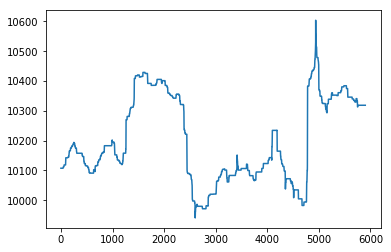

In [0]:
plt.plot(df3['midprice160'])

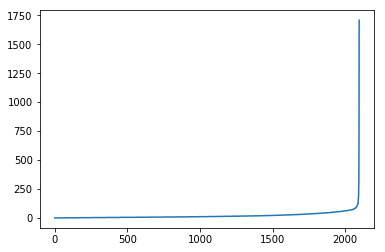

In [38]:
plt.plot(sorted(model.feature_importance()))

In [0]:
df3.columns

Index(['size', 'normalized_ave_true_range', 'three_outside_updown', 'breakway',
       'dark_cloud_cover', 'dragonfly_doji',
       'three_oupdown_sidebyside_white_linesutside_updown', 'haramisen',
       'haramhikkake_patternisen', 'neck_pattern', 'ema_ave700', 'dema_ave700',
       'midprice160', 'midprice700', 'correl5', 'correl10', 'correl60',
       'correl62', 'correl64', 'correl66', 'correl68', 'correl70', 'correl72',
       'correl74', 'correl76', 'correl78', 'correl80', 'correl82', 'correl84',
       'correl86', 'correl88', 'correl90', 'correl92', 'correl94', 'correl96',
       'correl98', 'correl100', 'correl102', 'correl104', 'correl106',
       'correl108', 'correl111', 'correl113', 'correl115', 'correl117',
       'correl119', 'correl121', 'correl123', 'correl125', 'correl127',
       'correl129', 'correl131', 'correl133', 'correl135', 'correl137',
       'correl139', 'correl141', 'correl143', 'correl145', 'correl147',
       'correl149', 'correl151', 'correl153', 'correl1

In [0]:
cons

array([   0,    0,    1, ..., 6838, 6839, 6841])

In [0]:
total_ind

array([   0,    1,    2, ..., 6838, 6839, 6841])

In [0]:
np.linspace(0,9,10, dtype=int)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [0]:
final_ind

array([   0,    1,    2, ..., 6838, 6839, 6841])

In [0]:
target_cols = []
cols = list(df2.columns)
for ind in uind:
    target_cols.append(cols[ind])

In [0]:
target_cols

In [0]:
target_ind = np.array([0])
map(lambda x: np.append(target_ind, np.where(x >= 0.9)[0]), corrs)

In [0]:
type(target_ind)

set

In [0]:
se

23900

In [0]:
#0.9以上のindexを全てlistni追加
target_col = np.array()

map(lambda x: , corrs)
#duplicationを削除
#remove cols

In [0]:
class test:
    @classmethod
    def data(cls):
        cls.data1 = 9
        
    @classmethod
    def calc1(cls, a):
        return a * cls.data1
    
    @classmethod
    def  func_list(cls):
        cls.funcs = {}
        cls.funcs[1] = test.calc1

calculating all index dict


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:425: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:425: RuntimeWarning:

divide by zero encountered in double_scalars



completed calc all index. time= 96.3179931640625
removing all correlated columns..


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:75: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2445: RuntimeWarning:

invalid value encountered in subtract

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2530: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2531: RuntimeWarning:

invalid value encountered in true_divide



removed 8806 colums remaining col=2137
time= 15.25834035873413
buy sell point data description:
train_x (13499, 2134)
train_y (13499,)
test_x (2918, 2134)
test_y (2918,)
valid_x (3375, 2134)
valid_y (3375,)


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:148: UserWarning:

Found `num_iterations` in params. Will use it instead of argument

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:153: UserWarning:

Found `early_stopping_rounds` in params. Will use it instead of argument



[1]	valid_0's binary_logloss: 0.795836
Training until validation scores don't improve for 50 rounds
[2]	valid_0's binary_logloss: 0.771329
[3]	valid_0's binary_logloss: 0.748746
[4]	valid_0's binary_logloss: 0.727766
[5]	valid_0's binary_logloss: 0.709045
[6]	valid_0's binary_logloss: 0.691797
[7]	valid_0's binary_logloss: 0.675383
[8]	valid_0's binary_logloss: 0.660686
[9]	valid_0's binary_logloss: 0.64763
[10]	valid_0's binary_logloss: 0.63458
[11]	valid_0's binary_logloss: 0.622592
[12]	valid_0's binary_logloss: 0.611951
[13]	valid_0's binary_logloss: 0.601892
[14]	valid_0's binary_logloss: 0.592431
[15]	valid_0's binary_logloss: 0.583224
[16]	valid_0's binary_logloss: 0.574953
[17]	valid_0's binary_logloss: 0.566625
[18]	valid_0's binary_logloss: 0.559186
[19]	valid_0's binary_logloss: 0.55211
[20]	valid_0's binary_logloss: 0.545249
[21]	valid_0's binary_logloss: 0.539236
[22]	valid_0's binary_logloss: 0.533374
[23]	valid_0's binary_logloss: 0.527537
[24]	valid_0's binary_logloss: 

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:148: UserWarning:

Found `num_iterations` in params. Will use it instead of argument

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:153: UserWarning:

Found `early_stopping_rounds` in params. Will use it instead of argument



[1]	valid_0's binary_logloss: 0.796147
Training until validation scores don't improve for 50 rounds
[2]	valid_0's binary_logloss: 0.771509
[3]	valid_0's binary_logloss: 0.749157
[4]	valid_0's binary_logloss: 0.728557
[5]	valid_0's binary_logloss: 0.709746
[6]	valid_0's binary_logloss: 0.692757
[7]	valid_0's binary_logloss: 0.676795
[8]	valid_0's binary_logloss: 0.662342
[9]	valid_0's binary_logloss: 0.648613
[10]	valid_0's binary_logloss: 0.636111
[11]	valid_0's binary_logloss: 0.624539
[12]	valid_0's binary_logloss: 0.613846
[13]	valid_0's binary_logloss: 0.603905
[14]	valid_0's binary_logloss: 0.594712
[15]	valid_0's binary_logloss: 0.58608
[16]	valid_0's binary_logloss: 0.577688
[17]	valid_0's binary_logloss: 0.569377
[18]	valid_0's binary_logloss: 0.562402
[19]	valid_0's binary_logloss: 0.555336
[20]	valid_0's binary_logloss: 0.54893
[21]	valid_0's binary_logloss: 0.543223
[22]	valid_0's binary_logloss: 0.537209
[23]	valid_0's binary_logloss: 0.531691
[24]	valid_0's binary_logloss:

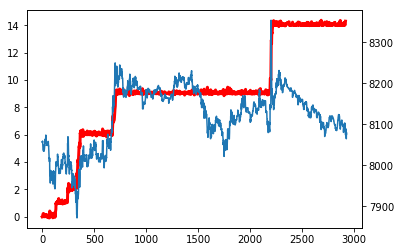

<Figure size 6000x6000 with 0 Axes>

In [11]:
'''

'''


import time
num_term = 10
pt = 100
lc = 20
corr_kijun = 0.9
upper_kijun = 0.5
lower_kijun = 0.4
initial_data_vol = 20000

train_size = 0.8
valid_size = 0.1



params = {'objective': 'binary','boosting': 'gbdt', 'learning_rate': 0.05, 'num_iterations': 15000, 'max_depth':6, 'num_leaves':500 ,'verbose_eval':False,  'verbose':-1, 'early_stopping_rounds':50}



start = time.time()
OneMinMarketData.initialize_for_bot(num_term, pt, lc, initial_data_vol)
df = OneMinMarketData.genrate_df_from_dict()
df, corrs = OneMinMarketData.remove_all_correlated_cols3(df, 0.9)

lgbmodel = LgbModel()
train_xb, test_xb, train_yb, test_yb, valid_xb, valid_yb = lgbmodel.generate_bpsp_data(df, train_size, valid_size)
model = lgbmodel.train_params_with_validations(train_xb, train_yb, valid_xb, valid_yb, params)
#OneMinMarketData.write_all_func_dict()

tp = lgbmodel.bp_prediciton(model, train_xb, upper_kijun)
print('train accuracy={}'.format(lgbmodel.calc_bp_accuracy(tp, train_yb)))
predictions = lgbmodel.bp_prediciton(model, test_xb, upper_kijun)
print('test accuracy={}'.format(lgbmodel.calc_bp_accuracy(predictions, test_yb)))
print('pred num buy='+str(sum(predictions)))

#importanceの上位200colだけ使って再学習
cols = lgbmodel.select_important_cols2(model, train_xb)
cols.extend(['open', 'high', 'low', 'close'])

with open('/content/drive/My Drive/Model/bpsp_cols.csv', 'w') as file:
    writer = csv.writer(file, lineterminator='\n')
    writer.writerow(cols)
print('completed write bpsp columns')

train_xb, test_xb, valid_xb = train_xb[cols], test_xb[cols], valid_xb[cols]
model = lgbmodel.train_params_with_validations(train_xb, train_yb, valid_xb, valid_yb, params)

tp = lgbmodel.bp_prediciton(model, train_xb, upper_kijun)
print('train accuracy={}'.format(lgbmodel.calc_bp_accuracy(tp, train_yb)))
predictions = lgbmodel.bp_prediciton(model, test_xb, upper_kijun)
print('test accuracy={}'.format(lgbmodel.calc_bp_accuracy(predictions, test_yb)))
print('pred num buy='+str(sum(predictions)))

with open('/content/drive/My Drive/Model/lgb_bpsp_model.dat', 'wb') as f:
    pickle.dump(model, f)
    

start_ind = OneMinMarketData.check_matched_index(test_xb)
sim = Sim()
ac = SimAccount()
ac = sim.sim_model_pred_onemin(start_ind, predictions, ac)
print('total pl={},num trade={},win rate={}, pl_stability={}, num_buy={}, num_sell={}'.format(ac.total_pl,ac.num_trade,ac.win_rate, ac.pl_stability, ac.num_buy,ac.num_sell))
print('strategy performance={}'.format(ac.total_pl * ac.pl_stability))

fig, ax1 = plt.subplots()
plt.figure(figsize=(30,30),dpi=200)
ax1.plot(ac.performance_total_pl_log,color='red',linewidth = 3.0,label='pl')
ax2 = ax1.twinx()
ax2.plot(OneMinMarketData.ohlc.close[start_ind:])
plt.show()
    

In [0]:
def select_important_cols():
    importance = pd.DataFrame(model.feature_importance(), index=list(train_xb.columns), columns=['importance'])
    data = importance.sort_values('importance',ascending=False)
    
    col = list(data.columns)[0]
    indicies = list(data.index)
    kijun = 0.9 * data[col].sum()
    
    cols = []
    current_sum = 0
    target = kijun
    i = 0
    while current_sum < target:
        current_sum += data[col].iloc[i]
        cols.append(indicies[i])
        i += 1
    return cols

r = select_important_cols()



In [13]:
with open('/content/drive/My Drive/Model/bpsp_cols.csv', 'w') as file:
    writer = csv.writer(file, lineterminator='\n')
    writer.writerow(cols)
print('completed write bpsp columns')

completed write bpsp columns


In [19]:
len(list(train_xb.columns))

200

In [0]:
import datetime, dateutil.parser
ts = '2019-08-23T14:34:00.000Z'
d = dateutil.parser.parse(ts)
dt = d.strftime('%Y-%m-%d %H:%M:%S')

In [0]:
ut = d.strftime('%s')

In [39]:
datetime.datetime.now()

datetime.datetime(2019, 9, 22, 5, 25, 44, 739812)

In [0]:
d = {"table":"trade","action":"insert","data":[{"timestamp":"2019-05-12T08:34:27.853Z","symbol":"XBTUSD","side":"Sell","size":41068,"price":7367,"tickDirection":"ZeroMinusTick","trdMatchID":"a9e0f35d-5c7d-f838-7492-b712ae9e32bd","grossValue":557457032,"homeNotional":5.57457032,"foreignNotional":41068},{"timestamp":"2019-05-12T08:34:27.853Z","symbol":"XBTUSD","side":"Sell","size":19,"price":7367,"tickDirection":"ZeroMinusTick","trdMatchID":"995210c4-65d1-49d5-3f24-8af933c7ea71","grossValue":257906,"homeNotional":0.00257906,"foreignNotional":19},{"timestamp":"2019-05-12T08:34:27.853Z","symbol":"XBTUSD","side":"Sell","size":51,"price":7367,"tickDirection":"ZeroMinusTick","trdMatchID":"e43bbee5-f645-305b-5331-49e8272f6189","grossValue":692274,"homeNotional":0.00692274,"foreignNotional":51},{"timestamp":"2019-05-12T08:34:27.853Z","symbol":"XBTUSD","side":"Sell","size":500,"price":7367,"tickDirection":"ZeroMinusTick","trdMatchID":"bc73d16b-b39f-3816-b9f9-cad9accb6200","grossValue":6787000,"homeNotional":0.06787,"foreignNotional":500},{"timestamp":"2019-05-12T08:34:27.853Z","symbol":"XBTUSD","side":"Sell","size":20,"price":7367,"tickDirection":"ZeroMinusTick","trdMatchID":"56f20dc3-d076-8c50-8f43-733752579b9b","grossValue":271480,"homeNotional":0.0027148,"foreignNotional":20},{"timestamp":"2019-05-12T08:34:27.853Z","symbol":"XBTUSD","side":"Sell","size":20,"price":7367,"tickDirection":"ZeroMinusTick","trdMatchID":"2ec8da21-5b3a-31da-6b55-312177032ea8","grossValue":271480,"homeNotional":0.0027148,"foreignNotional":20},{"timestamp":"2019-05-12T08:34:27.853Z","symbol":"XBTUSD","side":"Sell","size":31,"price":7367,"tickDirection":"ZeroMinusTick","trdMatchID":"a6b697ed-d378-cdc1-1aa6-1b534f2566b3","grossValue":420794,"homeNotional":0.00420794,"foreignNotional":31},{"timestamp":"2019-05-12T08:34:27.853Z","symbol":"XBTUSD","side":"Sell","size":1200,"price":7367,"tickDirection":"ZeroMinusTick","trdMatchID":"4f70b723-efbc-42fb-8883-3742647e4ba6","grossValue":16288800,"homeNotional":0.162888,"foreignNotional":1200},{"timestamp":"2019-05-12T08:34:27.853Z","symbol":"XBTUSD","side":"Sell","size":7091,"price":7367,"tickDirection":"ZeroMinusTick","trdMatchID":"60fb1d8a-b6f0-b353-ea41-54523dd7ab33","grossValue":96253234,"homeNotional":0.96253234,"foreignNotional":7091}]}

In [17]:


li

[7367, 7367, 7367, 7367, 7367, 7367, 7367, 7367, 7367]

In [14]:
for dd in d['data']:
    print(dd['price'])

7367
7367
7367
7367
7367
7367
7367
7367
7367


In [0]:
di = {"table":"trade","action":"insert","data":[{"timestamp":"2019-05-12T08:34:27.853Z","symbol":"XBTUSD","side":"Sell","size":41068,"price":7367,"tickDirection":"ZeroMinusTick","trdMatchID":"a9e0f35d-5c7d-f838-7492-b712ae9e32bd","grossValue":557457032,"homeNotional":5.57457032,"foreignNotional":41068},{"timestamp":"2019-05-12T08:34:27.853Z","symbol":"XBTUSD","side":"Sell","size":19,"price":7367,"tickDirection":"ZeroMinusTick","trdMatchID":"995210c4-65d1-49d5-3f24-8af933c7ea71","grossValue":257906,"homeNotional":0.00257906,"foreignNotional":19},{"timestamp":"2019-05-12T08:34:27.853Z","symbol":"XBTUSD","side":"Sell","size":51,"price":7367,"tickDirection":"ZeroMinusTick","trdMatchID":"e43bbee5-f645-305b-5331-49e8272f6189","grossValue":692274,"homeNotional":0.00692274,"foreignNotional":51},{"timestamp":"2019-05-12T08:34:27.853Z","symbol":"XBTUSD","side":"Sell","size":500,"price":7367,"tickDirection":"ZeroMinusTick","trdMatchID":"bc73d16b-b39f-3816-b9f9-cad9accb6200","grossValue":6787000,"homeNotional":0.06787,"foreignNotional":500},{"timestamp":"2019-05-12T08:34:27.853Z","symbol":"XBTUSD","side":"Sell","size":20,"price":7367,"tickDirection":"ZeroMinusTick","trdMatchID":"56f20dc3-d076-8c50-8f43-733752579b9b","grossValue":271480,"homeNotional":0.0027148,"foreignNotional":20},{"timestamp":"2019-05-12T08:34:27.853Z","symbol":"XBTUSD","side":"Sell","size":20,"price":7367,"tickDirection":"ZeroMinusTick","trdMatchID":"2ec8da21-5b3a-31da-6b55-312177032ea8","grossValue":271480,"homeNotional":0.0027148,"foreignNotional":20},{"timestamp":"2019-05-12T08:34:27.853Z","symbol":"XBTUSD","side":"Sell","size":31,"price":7367,"tickDirection":"ZeroMinusTick","trdMatchID":"a6b697ed-d378-cdc1-1aa6-1b534f2566b3","grossValue":420794,"homeNotional":0.00420794,"foreignNotional":31},{"timestamp":"2019-05-12T08:34:27.853Z","symbol":"XBTUSD","side":"Sell","size":1200,"price":7367,"tickDirection":"ZeroMinusTick","trdMatchID":"4f70b723-efbc-42fb-8883-3742647e4ba6","grossValue":16288800,"homeNotional":0.162888,"foreignNotional":1200},{"timestamp":"2019-05-12T08:34:27.853Z","symbol":"XBTUSD","side":"Sell","size":7091,"price":7367,"tickDirection":"ZeroMinusTick","trdMatchID":"60fb1d8a-b6f0-b353-ea41-54523dd7ab33","grossValue":96253234,"homeNotional":0.96253234,"foreignNotional":7091}]}

In [17]:
opendt = [d.get('timestamp') for d in di['data']]
size = [d.get('size') for d in di['data']]
min(size)

19

In [0]:
import datetime
condt = list(map(lambda x:  float(x.split(':')[2][:-1]), opendt))

In [19]:
size.index(min(size)) 

1

In [18]:
size

[41068, 19, 51, 500, 20, 20, 31, 1200, 7091]